In [1]:
# Load modules

import xarray as xr
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import zarr
import gcsfs
import xesmf as xe
from scipy.interpolate import griddata
from xmip.preprocessing import rename_cmip6

In [2]:
sst_control = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_sst_piControl_interp_2x2.nc')
sst_control.load()

mlotst_control = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_mlotst_piControl_interp_2x2.nc')
mlotst_control.load()

surface_control = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_surface_piControl_interp.nc')
surface_control.load()

sst_hist = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_sst_historical_interp_2x2.nc')
sst_hist.load()

mlotst_hist = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_mlotst_hist_interp_2x2.nc')
mlotst_hist.load()

surface_hist = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_surface_hist_interp.nc')
surface_hist.load()

<xarray.DataArray (name: 9, time: 1500, lat: 88, lon: 179)>
array([[[[ 4.90165056e+00,  5.02030481e+00,  5.14833517e+00, ...,
           4.42925605e+00,  4.56485558e+00,  4.66646627e+00],
         [ 4.59733384e+00,  4.82168076e+00,  4.98723783e+00, ...,
           3.81284670e+00,  3.96564983e+00,  4.19904078e+00],
         [ 4.02822119e+00,  4.18452456e+00,  4.37871187e+00, ...,
           3.16195200e+00,  3.32776068e+00,  3.54453707e+00],
         ...,
         [-3.46124473e+01, -3.68575683e+01, -3.48434307e+01, ...,
          -3.44554857e+01, -3.57958553e+01, -3.51358641e+01],
         [-3.32735436e+01, -3.38893754e+01, -3.38385741e+01, ...,
          -3.26756667e+01, -3.27437460e+01, -3.27906597e+01],
         [-3.46177860e+01, -3.51192427e+01, -3.58445793e+01, ...,
          -3.36690564e+01, -3.51623532e+01, -3.55597275e+01]],

        [[-2.86197465e+00, -2.93874279e+00, -3.03927916e+00, ...,
          -2.56575976e+00, -2.67832265e+00, -2.74031600e+00],
         [-2.12785747e+00, -2.32005957e+00, -2.40554916e+00, ...,
          -1.76238901e+00, -1.80849465e+00, -1.92474648e+00],
         [-1.41721594e+00, -1.48068312e+00, -1.55627523e+00, ...,
          -9.75113796e-01, -1.02866159e+00, -1.15787975e+00],
...
         [-4.22657914e+01, -4.27121239e+01, -4.25050988e+01, ...,
          -4.14794275e+01, -4.14537856e+01, -4.16859040e+01],
         [-4.16607946e+01, -4.18207167e+01, -4.15129903e+01, ...,
          -4.08408854e+01, -4.07483856e+01, -4.08952654e+01],
         [-4.09747304e+01, -4.15050773e+01, -4.12692748e+01, ...,
          -3.93983996e+01, -3.99012588e+01, -4.01739465e+01]],

        [[ 3.72216024e+00,  3.72758932e+00,  3.73674215e+00, ...,
           3.69827086e+00,  3.70587259e+00,  3.71236349e+00],
         [ 3.78478374e+00,  3.80151044e+00,  3.80537598e+00, ...,
           3.69636811e+00,  3.71102061e+00,  3.73913749e+00],
         [ 3.62171032e+00,  3.63325908e+00,  3.67212569e+00, ...,
           3.65140738e+00,  3.64544715e+00,  3.62874548e+00],
         ...,
         [-2.50812586e+01, -2.53460143e+01, -2.53195316e+01, ...,
          -2.65939754e+01, -2.71630297e+01, -2.63456181e+01],
         [-2.66460704e+01, -2.65967282e+01, -2.59333669e+01, ...,
          -2.72300927e+01, -2.67794278e+01, -2.68775401e+01],
         [-2.90347791e+01, -2.92975723e+01, -2.93255644e+01, ...,
          -2.95780620e+01, -3.00762300e+01, -3.00066347e+01]]]])
Coordinates:
  * time     (time) datetime64[ns] 1851-01-31 1851-02-28 ... 1975-12-31
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * name     (name) object 'BCC-CSM2-MR/historical/r1i1p1f1/hfls_Amon_BCC-CSM...

In [3]:
ocean_hist = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/ocean_flux_hist_chain.nc')
ocean_hist.load()

ocean_control = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/ocean_flux_control_chain.nc')
ocean_control.load()

<xarray.DataArray (time: 1500, name: 9, lat: 88, lon: 179)>
array([[[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
...
         [ 9.01166469e+02,  8.66372883e+02,  8.05182756e+02, ...,
           8.52461909e+02,  7.74129522e+02,  8.79198153e+02],
         [ 4.69511953e+02,  4.65400051e+02,  4.61852918e+02, ...,
           2.19065051e+02,  1.90809829e+02,  2.47145417e+02],
         [ 4.41251185e+02,  4.81788489e+02,  5.23698296e+02, ...,
           4.04606994e+02,  3.75296735e+02,  3.71653985e+02]],

        [[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         ...,
         [ 4.66339441e+03,  4.67776550e+03,  4.68812914e+03, ...,
           4.17193895e+03,  4.43452273e+03,  4.57972556e+03],
         [ 3.32725911e+03,  3.34940843e+03,  3.37927557e+03, ...,
           3.09985508e+03,  3.18926486e+03,  3.25795055e+03],
         [ 2.47840923e+03,  2.46668143e+03,  2.44256537e+03, ...,
           2.50118345e+03,  2.49483951e+03,  2.48508804e+03]]]])
Coordinates:
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * time     (time) datetime64[ns] 1851-01-31 1851-02-28 ... 1975-12-31
  * name     (name) object 'GFDL-CM4' 'GFDL-ESM4' ... 'CESM2-WACCM'

In [3]:
sst_control

<xarray.DataArray 'ts' (name: 9, time: 1800, lat: 88, lon: 179)>
array([[[[243.18496246, 243.0430336 , 242.90864563, ..., 243.75744705,
          243.6136322 , 243.47025681],
         [243.91621094, 243.58426437, 243.37599564, ..., 245.18914566,
          244.86694336, 244.54597549],
         [245.59149551, 245.1326683 , 244.65911102, ..., 247.68568878,
          247.14878464, 246.61694489],
         ...,
         [239.55025787, 239.92131195, 240.25101852, ..., 237.72741852,
          237.87510681, 238.06498566],
         [238.32813339, 238.6320961 , 238.78931427, ..., 237.56899948,
          237.70903015, 237.84785614],
         [236.66961594, 236.70400772, 236.74081421, ..., 236.53036346,
          236.56542206, 236.60032578]],

        [[231.3177597 , 231.15438766, 231.01077652, ..., 231.97694626,
          231.81131363, 231.64621048],
         [232.09978867, 231.65678024, 231.46744919, ..., 233.87158051,
          233.43950653, 233.00966873],
         [234.51739807, 234.01972885, 233.50682068, ..., 237.02090225,
          236.37061691, 235.73139725],
...
         [251.29112768, 251.97457484, 252.70198619, ..., 248.73550842,
          249.15186284, 249.83927811],
         [248.55904592, 248.85080626, 249.07765664, ..., 247.65630731,
          247.8838022 , 248.08493076],
         [247.15915583, 247.27209005, 247.39439189, ..., 246.8036942 ,
          246.87435354, 246.96408844]],

        [[244.07377345, 243.8329955 , 243.75771637, ..., 244.73221507,
          244.61938324, 244.50407796],
         [245.63615943, 245.34104818, 245.10166083, ..., 246.77903459,
          246.47264057, 246.19467994],
         [248.63846017, 248.20675481, 247.72825131, ..., 250.44441822,
          249.99568346, 249.55431046],
         ...,
         [245.51890732, 245.87959232, 246.25328327, ..., 243.63938451,
          244.12683555, 244.66070306],
         [245.57855326, 245.7607822 , 245.9205602 , ..., 244.87024443,
          245.05658425, 245.26162347],
         [245.28333588, 245.33781189, 245.39282252, ..., 244.96639857,
          245.04462229, 245.14254435]]]])
Coordinates:
  * time     (time) datetime64[ns] 1851-01-31 1851-02-28 ... 2000-12-31
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * name     (name) object 'CMIP.NOAA-GFDL.GFDL-CM4.piControl.r1i1p1f1.Amon.t...
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Surface Temperature
    original_name:  ts
    standard_name:  surface_temperature
    units:          K

In [4]:
sst_control = sst_control.to_dataset('name').rename_vars({'CMIP.NOAA-GFDL.GFDL-CM4.piControl.r1i1p1f1.Amon.ts.gr1.v20180701':'GFDL-CM4',
                                                         'CMIP.NOAA-GFDL.GFDL-ESM4.piControl.r1i1p1f1.Amon.ts.gr1.v20180701':'GFDL-ESM4',
                                                         'CMIP.CNRM-CERFACS.CNRM-CM6-1.piControl.r1i1p1f2.Amon.ts.gr.v20180814':'CNRM-CM6-1',
                                                         'CMIP.NASA-GISS.GISS-E2-1-G.piControl.r1i1p1f1.Amon.ts.gn.v20180824':'GISS-E2-1-G',
                                                         'CMIP.BCC.BCC-CSM2-MR.piControl.r1i1p1f1.Amon.ts.gn.v20181016':'BCC-CSM2-MR',
                                                         'CMIP.CNRM-CERFACS.CNRM-ESM2-1.piControl.r1i1p1f2.Amon.ts.gr.v20181115':'CNRM-ESM2-1',
                                                         'CMIP.BCC.BCC-ESM1.piControl.r1i1p1f1.Amon.ts.gn.v20181214':'BCC-ESM1',
                                                         'CMIP.IPSL.IPSL-CM6A-LR.piControl.r1i2p1f1.Amon.ts.gr.v20190319':'IPSL-CM6A-LR',
                                                         'CMIP.NCAR.CESM2-WACCM.piControl.r1i1p1f1.Amon.ts.gn.v20190320':'CESM2-WACCM'}).to_array('name')
sst_control

<xarray.DataArray (name: 9, time: 1800, lat: 88, lon: 179)>
array([[[[243.18496246, 243.0430336 , 242.90864563, ..., 243.75744705,
          243.6136322 , 243.47025681],
         [243.91621094, 243.58426437, 243.37599564, ..., 245.18914566,
          244.86694336, 244.54597549],
         [245.59149551, 245.1326683 , 244.65911102, ..., 247.68568878,
          247.14878464, 246.61694489],
         ...,
         [239.55025787, 239.92131195, 240.25101852, ..., 237.72741852,
          237.87510681, 238.06498566],
         [238.32813339, 238.6320961 , 238.78931427, ..., 237.56899948,
          237.70903015, 237.84785614],
         [236.66961594, 236.70400772, 236.74081421, ..., 236.53036346,
          236.56542206, 236.60032578]],

        [[231.3177597 , 231.15438766, 231.01077652, ..., 231.97694626,
          231.81131363, 231.64621048],
         [232.09978867, 231.65678024, 231.46744919, ..., 233.87158051,
          233.43950653, 233.00966873],
         [234.51739807, 234.01972885, 233.50682068, ..., 237.02090225,
          236.37061691, 235.73139725],
...
         [251.29112768, 251.97457484, 252.70198619, ..., 248.73550842,
          249.15186284, 249.83927811],
         [248.55904592, 248.85080626, 249.07765664, ..., 247.65630731,
          247.8838022 , 248.08493076],
         [247.15915583, 247.27209005, 247.39439189, ..., 246.8036942 ,
          246.87435354, 246.96408844]],

        [[244.07377345, 243.8329955 , 243.75771637, ..., 244.73221507,
          244.61938324, 244.50407796],
         [245.63615943, 245.34104818, 245.10166083, ..., 246.77903459,
          246.47264057, 246.19467994],
         [248.63846017, 248.20675481, 247.72825131, ..., 250.44441822,
          249.99568346, 249.55431046],
         ...,
         [245.51890732, 245.87959232, 246.25328327, ..., 243.63938451,
          244.12683555, 244.66070306],
         [245.57855326, 245.7607822 , 245.9205602 , ..., 244.87024443,
          245.05658425, 245.26162347],
         [245.28333588, 245.33781189, 245.39282252, ..., 244.96639857,
          245.04462229, 245.14254435]]]])
Coordinates:
  * time     (time) datetime64[ns] 1851-01-31 1851-02-28 ... 2000-12-31
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * name     (name) object 'GFDL-CM4' 'GFDL-ESM4' ... 'CESM2-WACCM'
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Surface Temperature
    original_name:  ts
    standard_name:  surface_temperature
    units:          K

In [7]:
sst_rolling = sst_control.rolling(time=300, center=True).mean('time')
sst_var = sst_rolling.std('time')
sst_ensmean = sst_var.mean('name')

Text(0.5, 1.0, 'Interdecadal SST Variability')

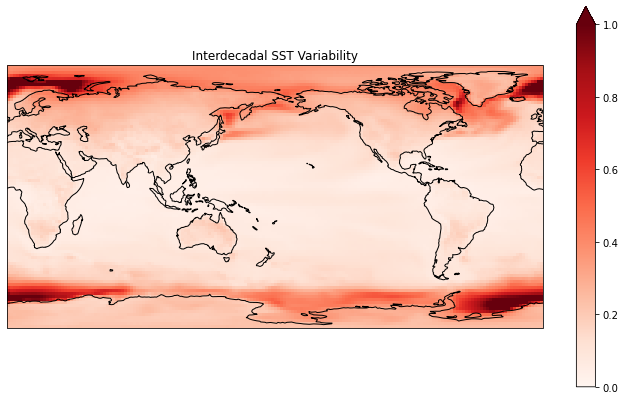

In [8]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
sst_ensmean.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds', vmin=0, vmax=1)
ax.coastlines(color='black', linewidth=1)
plt.title('Interdecadal SST Variability')

In [9]:
sst_mean = sst_control.mean('time').mean('name')

Text(0.5, 1.0, 'Mean SST')

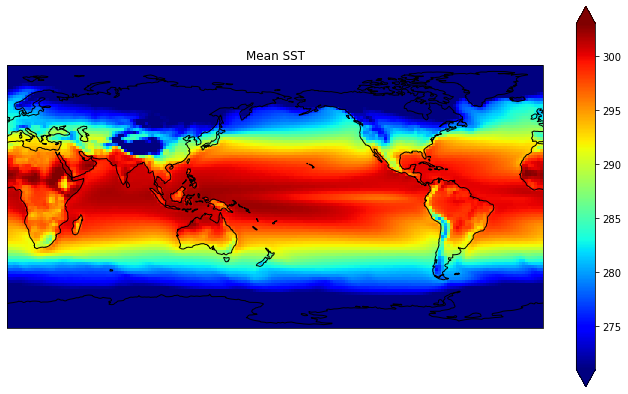

In [19]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
sst_mean.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='jet', vmin=271, vmax=303)
ax.coastlines(color='black', linewidth=1)
plt.title('Mean SST')

In [5]:
mlotst_control

<xarray.DataArray 'mlotst' (name: 9, time: 1500, lat: 88, lon: 179)>
array([[[[        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         ...,
         [50.41090584, 52.04710674, 50.50968361, ..., 48.75899982,
          49.236413  , 46.89223766],
         [31.22230101, 32.50833845, 32.35529757, ..., 40.54614592,
          40.76375866, 39.32892752],
         [53.78388977, 52.79047012, 53.00532818, ..., 47.45863438,
          47.6057272 , 50.86550903]],

        [[        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
...
         [38.03953743, 37.81469536, 37.70919704, ..., 40.9728775 ,
          39.8340168 , 38.88364983],
         [40.98170757, 40.75686169, 40.58196259, ..., 42.68622303,
          42.07203102, 41.62069225],
         [43.39238262, 43.27069187, 43.17329216, ..., 44.04097748,
          43.85855961, 43.69350433]],

        [[        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         ...,
         [53.20952702, 53.05169392, 53.01519585, ..., 54.56570148,
          54.22429848, 53.73252964],
         [52.8489809 , 52.7410326 , 52.69829273, ..., 53.71188927,
          53.39556599, 53.19498539],
         [53.00887299, 52.90163422, 52.78824043, ..., 53.48878574,
          53.35057068, 53.23210239]]]])
Coordinates:
    latitude   (lat, lon) float32 nan nan nan nan nan ... 86.99 86.92 86.8 86.61
    longitude  (lat, lon) float32 nan nan nan nan ... -5.602 2.988 11.02 18.28
  * time       (time) datetime64[ns] 1851-01-31 1851-02-28 ... 1975-12-31
  * lat        (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon        (lon) int64 1 3 5 7 9 11 13 15 ... 345 347 349 351 353 355 357
  * name       (name) object '.CMIP.NOAA-GFDL.GFDL-CM4.piControl.r1i1p1f1.Omo...
Attributes:
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Ocean Mixed Layer Thickness Defined by Sigma T
    original_name:  mlotst
    standard_name:  ocean_mixed_layer_thickness_defined_by_sigma_t
    units:          m

In [5]:
mlotst_control = mlotst_control.to_dataset('name').rename_vars({'.CMIP.NOAA-GFDL.GFDL-CM4.piControl.r1i1p1f1.Omon.mlotst.gr.v20180701':'GFDL-CM4',
                                                          '.CMIP.NOAA-GFDL.GFDL-ESM4.piControl.r1i1p1f1.Omon.mlotst.gr.v20180701':'GFDL-ESM4',
                                                          '.CMIP.CNRM-CERFACS.CNRM-CM6-1.piControl.r1i1p1f2.Omon.mlotst.gn.v20180814':'CNRM-CM6-1',
                                                          '.CMIP.NASA-GISS.GISS-E2-1-G.piControl.r1i1p1f1.Omon.mlotst.gn.v20180824':'GISS-E2-1-G',
                                                          '.CMIP.BCC.BCC-CSM2-MR.piControl.r1i1p1f1.Omon.mlotst.gn.v20181015':'BCC-CSM2-MR',
                                                          '.CMIP.CNRM-CERFACS.CNRM-ESM2-1.piControl.r1i1p1f2.Omon.mlotst.gn.v20181115':'CNRM-ESM2-1',
                                                          '.CMIP.BCC.BCC-ESM1.piControl.r1i1p1f1.Omon.mlotst.gn.v20181218':'BCC-ESM1',
                                                          '.CMIP.IPSL.IPSL-CM6A-LR.piControl.r1i2p1f1.Omon.mlotst.gn.v20190319':'IPSL-CM6A-LR',
                                                          '.CMIP.NCAR.CESM2-WACCM.piControl.r1i1p1f1.Omon.mlotst.gr.v20190320':'CESM2-WACCM'}).to_array('name')
mlotst_control

<xarray.DataArray (name: 9, time: 1500, lat: 88, lon: 179)>
array([[[[        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         ...,
         [50.41090584, 52.04710674, 50.50968361, ..., 48.75899982,
          49.236413  , 46.89223766],
         [31.22230101, 32.50833845, 32.35529757, ..., 40.54614592,
          40.76375866, 39.32892752],
         [53.78388977, 52.79047012, 53.00532818, ..., 47.45863438,
          47.6057272 , 50.86550903]],

        [[        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
...
         [38.03953743, 37.81469536, 37.70919704, ..., 40.9728775 ,
          39.8340168 , 38.88364983],
         [40.98170757, 40.75686169, 40.58196259, ..., 42.68622303,
          42.07203102, 41.62069225],
         [43.39238262, 43.27069187, 43.17329216, ..., 44.04097748,
          43.85855961, 43.69350433]],

        [[        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         ...,
         [53.20952702, 53.05169392, 53.01519585, ..., 54.56570148,
          54.22429848, 53.73252964],
         [52.8489809 , 52.7410326 , 52.69829273, ..., 53.71188927,
          53.39556599, 53.19498539],
         [53.00887299, 52.90163422, 52.78824043, ..., 53.48878574,
          53.35057068, 53.23210239]]]])
Coordinates:
    latitude   (lat, lon) float32 nan nan nan nan nan ... 86.99 86.92 86.8 86.61
    longitude  (lat, lon) float32 nan nan nan nan ... -5.602 2.988 11.02 18.28
  * time       (time) datetime64[ns] 1851-01-31 1851-02-28 ... 1975-12-31
  * lat        (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon        (lon) int64 1 3 5 7 9 11 13 15 ... 345 347 349 351 353 355 357
  * name       (name) object 'GFDL-CM4' 'GFDL-ESM4' ... 'CESM2-WACCM'
Attributes:
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Ocean Mixed Layer Thickness Defined by Sigma T
    original_name:  mlotst
    standard_name:  ocean_mixed_layer_thickness_defined_by_sigma_t
    units:          m

In [20]:
mlotst_rolling = mlotst_control.rolling(time=300, center=True).mean('time')
mlotst_var = mlotst_rolling.std('time')
mlotst_ensmean = mlotst_var.mean('name')

Text(0.5, 1.0, 'Interdecadal Mixed Layer Height Variability')

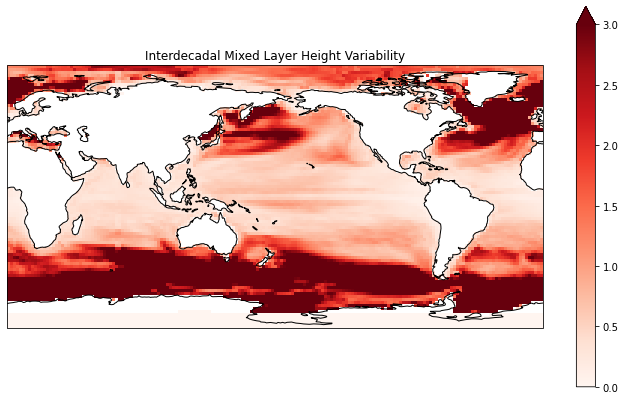

In [32]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
mlotst_ensmean.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds', vmin=0, vmax=3)
ax.coastlines(color='black', linewidth=1)
plt.title('Interdecadal Mixed Layer Height Variability')

In [23]:
mlotst_mean = mlotst_control.mean('time').mean('name')

Text(0.5, 1.0, 'Mean Mixed Layer Height')

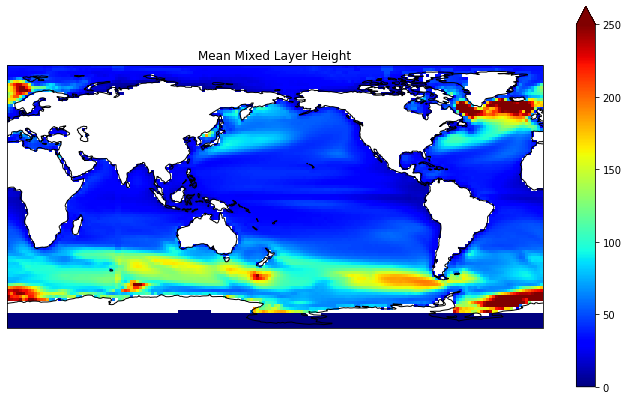

In [33]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
mlotst_mean.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='jet', vmin=0, vmax=250)
ax.coastlines(color='black', linewidth=1)
plt.title('Mean Mixed Layer Height')

In [3]:
surface_control

<xarray.DataArray (name: 9, time: 1500, lat: 88, lon: 179)>
array([[[[ 3.39850302e+00,  3.41417246e+00,  3.45564645e+00, ...,
           3.26545729e+00,  3.27783883e+00,  3.32447948e+00],
         [ 3.28054698e+00,  3.29991967e+00,  3.30187870e+00, ...,
           3.25308862e+00,  3.28090054e+00,  3.26411404e+00],
         [ 4.05409673e+00,  3.99146260e+00,  3.91367162e+00, ...,
           3.93799453e+00,  4.09078838e+00,  4.11297579e+00],
         ...,
         [-3.03136781e+01, -3.01690631e+01, -3.05290376e+01, ...,
          -2.71065312e+01, -2.80005614e+01, -2.87211936e+01],
         [-2.87204652e+01, -2.92860922e+01, -3.01703797e+01, ...,
          -2.72294478e+01, -2.71159994e+01, -2.71639947e+01],
         [-2.64169938e+01, -2.61577167e+01, -2.62717127e+01, ...,
          -2.78791483e+01, -2.70144323e+01, -2.70226429e+01]],

        [[-1.77046449e+00, -1.78380866e+00, -1.86195850e+00, ...,
          -1.55690938e+00, -1.58058143e+00, -1.65905673e+00],
         [-1.73856327e+00, -1.82117826e+00, -1.87870931e+00, ...,
          -1.56793132e+00, -1.63132377e+00, -1.64435299e+00],
         [-2.35685349e+00, -2.30634801e+00, -2.31745261e+00, ...,
          -2.10030796e+00, -2.23765094e+00, -2.31238928e+00],
...
         [-4.12004921e+01, -4.16000320e+01, -4.08972321e+01, ...,
          -3.67821884e+01, -3.76696243e+01, -3.85909019e+01],
         [-3.76136894e+01, -3.83689163e+01, -3.89362183e+01, ...,
          -3.68359726e+01, -3.70287552e+01, -3.72182953e+01],
         [-3.60778816e+01, -3.60573830e+01, -3.60510521e+01, ...,
          -3.61414474e+01, -3.61282425e+01, -3.61133522e+01]],

        [[ 1.06452133e+01,  1.06054977e+01,  1.05820847e+01, ...,
           1.07948074e+01,  1.07587433e+01,  1.07218307e+01],
         [ 1.02828903e+01,  1.06112442e+01,  1.07531891e+01, ...,
           1.00353378e+01,  1.00266724e+01,  1.00183624e+01],
         [ 9.98862762e+00,  9.73443909e+00,  9.64264679e+00, ...,
           9.84324188e+00,  9.39447021e+00,  9.01401978e+00],
         ...,
         [-4.65505783e+01, -4.73075455e+01, -4.80323677e+01, ...,
          -3.93636360e+01, -4.12918701e+01, -4.32426682e+01],
         [-3.88982155e+01, -3.87834625e+01, -3.88026314e+01, ...,
          -3.73384537e+01, -3.78218536e+01, -3.82949722e+01],
         [-3.69558975e+01, -3.69983612e+01, -3.70232773e+01, ...,
          -3.67733414e+01, -3.68208046e+01, -3.68671371e+01]]]])
Coordinates:
  * time     (time) datetime64[ns] 1851-01-31 1851-02-28 ... 1975-12-31
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * name     (name) object 'BCC-CSM2-MR/piControl/r1i1p1f1/hfls_Amon_BCC-CSM2...

In [6]:
surface_control = surface_control.to_dataset('name').rename_vars({'BCC-CSM2-MR/piControl/r1i1p1f1/hfls_Amon_BCC-CSM2-MR_piControl_r1i1p1f1_gn_185001-244912.nc':'BCC-CSM2-MR',
                                                                  'BCC-ESM1/piControl/r1i1p1f1/hfls_Amon_BCC-ESM1_piControl_r1i1p1f1_gn_185001-230012.nc':'BCC-ESM1',
                                                                  'CESM2-WACCM/piControl/r1i1p1f1/hfls_Amon_CESM2-WACCM_piControl_r1i1p1f1_gn_000101-049912.nc':'CESM2-WACCM',
                                                                  'CNRM-CM6-1/piControl/r1i1p1f2/hfls_Amon_CNRM-CM6-1_piControl_r1i1p1f2_gr_185001-234912.nc':'CNRM-CM6-1',
                                                                  'CNRM-ESM2-1/piControl/r1i1p1f2/hfls_Amon_CNRM-ESM2-1_piControl_r1i1p1f2_gr_185001-234912.nc':'CNRM-ESM2-1',
                                                                  'GISS-E2-1-G/piControl/r101i1p1f1/hfls_Amon_GISS-E2-1-G_piControl_r101i1p1f1_gn_185001-201412.nc':'GISS-E2-1-G',
                                                                  'IPSL-CM6A-LR/piControl/r1i1p1f1/hfls_Amon_IPSL-CM6A-LR_piControl_r1i1p1f1_gr_185001-304912.nc':'IPSL-CM6A-LR',
                                                                  'GFDL-CM4/piControl/r1i1p1f1/hfls_Amon_GFDL-CM4_piControl_r1i1p1f1_gr1_015101-065012.nc':'GFDL-CM4',
                                                                  'GFDL-ESM4/piControl/r1i1p1f1/hfls_Amon_GFDL-ESM4_piControl_r1i1p1f1_gr1_000101-050012.nc':'GFDL-ESM4'}).to_array('name')
surface_control

<xarray.DataArray (name: 9, time: 1500, lat: 88, lon: 179)>
array([[[[ 3.39850302e+00,  3.41417246e+00,  3.45564645e+00, ...,
           3.26545729e+00,  3.27783883e+00,  3.32447948e+00],
         [ 3.28054698e+00,  3.29991967e+00,  3.30187870e+00, ...,
           3.25308862e+00,  3.28090054e+00,  3.26411404e+00],
         [ 4.05409673e+00,  3.99146260e+00,  3.91367162e+00, ...,
           3.93799453e+00,  4.09078838e+00,  4.11297579e+00],
         ...,
         [-3.03136781e+01, -3.01690631e+01, -3.05290376e+01, ...,
          -2.71065312e+01, -2.80005614e+01, -2.87211936e+01],
         [-2.87204652e+01, -2.92860922e+01, -3.01703797e+01, ...,
          -2.72294478e+01, -2.71159994e+01, -2.71639947e+01],
         [-2.64169938e+01, -2.61577167e+01, -2.62717127e+01, ...,
          -2.78791483e+01, -2.70144323e+01, -2.70226429e+01]],

        [[-1.77046449e+00, -1.78380866e+00, -1.86195850e+00, ...,
          -1.55690938e+00, -1.58058143e+00, -1.65905673e+00],
         [-1.73856327e+00, -1.82117826e+00, -1.87870931e+00, ...,
          -1.56793132e+00, -1.63132377e+00, -1.64435299e+00],
         [-2.35685349e+00, -2.30634801e+00, -2.31745261e+00, ...,
          -2.10030796e+00, -2.23765094e+00, -2.31238928e+00],
...
         [-4.12004921e+01, -4.16000320e+01, -4.08972321e+01, ...,
          -3.67821884e+01, -3.76696243e+01, -3.85909019e+01],
         [-3.76136894e+01, -3.83689163e+01, -3.89362183e+01, ...,
          -3.68359726e+01, -3.70287552e+01, -3.72182953e+01],
         [-3.60778816e+01, -3.60573830e+01, -3.60510521e+01, ...,
          -3.61414474e+01, -3.61282425e+01, -3.61133522e+01]],

        [[ 1.06452133e+01,  1.06054977e+01,  1.05820847e+01, ...,
           1.07948074e+01,  1.07587433e+01,  1.07218307e+01],
         [ 1.02828903e+01,  1.06112442e+01,  1.07531891e+01, ...,
           1.00353378e+01,  1.00266724e+01,  1.00183624e+01],
         [ 9.98862762e+00,  9.73443909e+00,  9.64264679e+00, ...,
           9.84324188e+00,  9.39447021e+00,  9.01401978e+00],
         ...,
         [-4.65505783e+01, -4.73075455e+01, -4.80323677e+01, ...,
          -3.93636360e+01, -4.12918701e+01, -4.32426682e+01],
         [-3.88982155e+01, -3.87834625e+01, -3.88026314e+01, ...,
          -3.73384537e+01, -3.78218536e+01, -3.82949722e+01],
         [-3.69558975e+01, -3.69983612e+01, -3.70232773e+01, ...,
          -3.67733414e+01, -3.68208046e+01, -3.68671371e+01]]]])
Coordinates:
  * time     (time) datetime64[ns] 1851-01-31 1851-02-28 ... 1975-12-31
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * name     (name) object 'BCC-CSM2-MR' 'BCC-ESM1' ... 'GFDL-CM4' 'GFDL-ESM4'

In [37]:
surface_rolling = surface_control.rolling(time=300, center=True).mean('time')
surface_var = surface_rolling.std('time')
surface_ensmean = surface_var.mean('name')

Text(0.5, 1.0, 'Interdecadal Surface Radiation Variability')

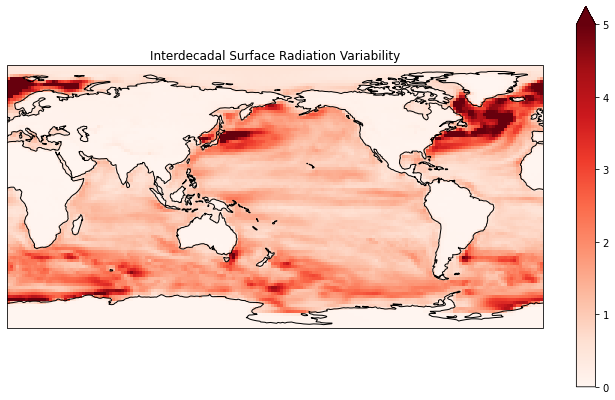

In [39]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
surface_ensmean.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds', vmin=0, vmax=5)
ax.coastlines(color='black', linewidth=1)
plt.title('Interdecadal Surface Radiation Variability')

In [4]:
surface_mean = surface_control.mean('time').mean('name')

Text(0.5, 1.0, 'Mean Surface Radiation')

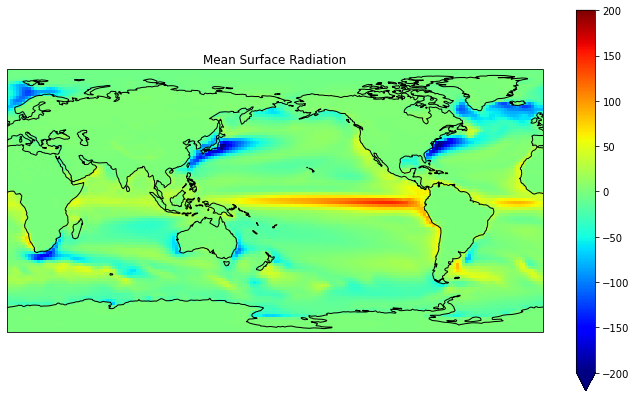

In [9]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
surface_mean.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='jet', vmin=-200, vmax=200)
ax.coastlines(color='black', linewidth=1)
plt.title('Mean Surface Radiation')

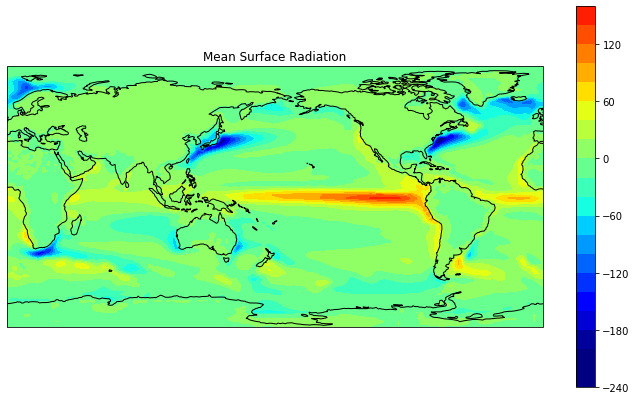

In [14]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
plt.contourf(surface_mean.lon, surface_mean.lat, surface_mean, transform=ccrs.PlateCarree(), cmap='jet', vmin=-200, vmax=200, levels=20)
ax.coastlines(color='black', linewidth=1)
plt.title('Mean Surface Radiation')
plt.colorbar()

# Chain Rule - No Yearly Averages

In [6]:
new_time_index=pd.date_range(start='1851-01-01',freq='M',periods=1500)

density = 1026 #Water density - kg/m3
c_p = 3850 #Specific heat of salt water - J/kgC
seconds = 60*60*24*30 #Time in a month - seconds

sst_control = sst_control.isel(time=slice(0,1500))

ocean_flux_control_chain = xr.DataArray(np.zeros((1500,9,88,179)), dims=['time','name','lat','lon'])
for t in range(1,len(sst_control['time'].values)):
    i = 0
    for model in sst_control['name'].values:
        ocean_flux_control_chain[t,i,:,:] = density*c_p*mlotst_control.isel(time=t).sel(name=model)*(sst_control.isel(time=t).sel(name=model) - 
                                                                                                 sst_control.isel(time=t-1).sel(name=model))/seconds + \
                                                 density*c_p*sst_control.isel(time=t).sel(name=model)*(mlotst_control.isel(time=t).sel(name=model) - 
                                                                                                 mlotst_control.isel(time=t-1).sel(name=model))/seconds \
                                   - surface_control.isel(time=t).sel(name=model)
        i += 1
    if t%300==0:
        print(t)
        
ocean_flux_control_chain.coords['lon'] = sst_control['lon'].values
ocean_flux_control_chain.coords['lat'] = sst_control['lat'].values
ocean_flux_control_chain.coords['time'] = new_time_index
ocean_flux_control_chain.coords['name'] = sst_control['name'].values
ocean_flux_control_chain

300
600
900
1200


<xarray.DataArray (time: 1500, name: 9, lat: 88, lon: 179)>
array([[[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
...
         [ 9.01166469e+02,  8.66372883e+02,  8.05182756e+02, ...,
           8.52461909e+02,  7.74129522e+02,  8.79198153e+02],
         [ 4.69511953e+02,  4.65400051e+02,  4.61852918e+02, ...,
           2.19065051e+02,  1.90809829e+02,  2.47145417e+02],
         [ 4.41251185e+02,  4.81788489e+02,  5.23698296e+02, ...,
           4.04606994e+02,  3.75296735e+02,  3.71653985e+02]],

        [[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         ...,
         [ 4.66339441e+03,  4.67776550e+03,  4.68812914e+03, ...,
           4.17193895e+03,  4.43452273e+03,  4.57972556e+03],
         [ 3.32725911e+03,  3.34940843e+03,  3.37927557e+03, ...,
           3.09985508e+03,  3.18926486e+03,  3.25795055e+03],
         [ 2.47840923e+03,  2.46668143e+03,  2.44256537e+03, ...,
           2.50118345e+03,  2.49483951e+03,  2.48508804e+03]]]])
Coordinates:
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * time     (time) datetime64[ns] 1851-01-31 1851-02-28 ... 1975-12-31
  * name     (name) object 'GFDL-CM4' 'GFDL-ESM4' ... 'CESM2-WACCM'

In [7]:
ocean_flux_control_chain_rolling = ocean_flux_control_chain.rolling(time=300, center=True).mean('time')
ocean_flux_control_chain_var = ocean_flux_control_chain_rolling.std('time')
ocean_flux_control_chain_ensmean = ocean_flux_control_chain_var.mean('name')

Text(0.5, 1.0, 'Control Ocean Flux Interdecadal Variability (>25 yrs) - CMIP6')

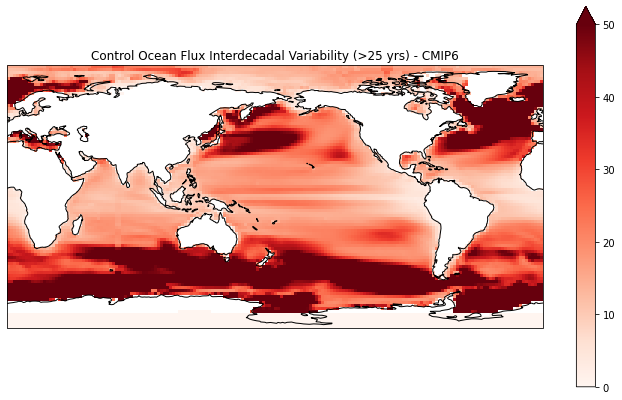

In [10]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ocean_flux_control_chain_ensmean.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds', vmin=0, vmax=50)
ax.coastlines(color='black', linewidth=1)
plt.title('Control Ocean Flux Interdecadal Variability (>25 yrs) - CMIP6')

In [11]:
ocean_flux_control_chain.to_netcdf('/data/keeling/a/mailes2/a/processed_var_data/ocean_flux_control_chain.nc')

# Original - no chain rule, no yearly averages

In [7]:
new_time_index=pd.date_range(start='1851-01-01',freq='M',periods=1500)

density = 1026 #Water density - kg/m3
c_p = 3850 #Specific heat of salt water - J/kgC
seconds = 2600000 #Time in a month - seconds

sst_control = sst_control.isel(time=slice(0,1500))

ocean_flux_control = xr.DataArray(np.zeros((1500,9,88,179)), dims=['time','name','lat','lon'])
for t in range(1,len(sst_control['time'].values)):
    i = 0
    for model in sst_control['name'].values:
        ocean_flux_control[t,i,:,:] = density*c_p*mlotst_control.isel(time=t).sel(name=model)*(sst_control.isel(time=t).sel(name=model) - 
                                                                                                 sst_control.isel(time=t-1).sel(name=model))/seconds \
                                   - surface_control.isel(time=t).sel(name=model)
        i += 1
    if t%300==0:
        print(t)
        
ocean_flux_control.coords['lon'] = sst_control['lon'].values
ocean_flux_control.coords['lat'] = sst_control['lat'].values
ocean_flux_control.coords['time'] = new_time_index
ocean_flux_control.coords['name'] = sst_control['name'].values
ocean_flux_control

300
600
900
1200


<xarray.DataArray (time: 1500, name: 9, lat: 88, lon: 179)>
array([[[[    0.        ,     0.        ,     0.        , ...,
              0.        ,     0.        ,     0.        ],
         [    0.        ,     0.        ,     0.        , ...,
              0.        ,     0.        ,     0.        ],
         [    0.        ,     0.        ,     0.        , ...,
              0.        ,     0.        ,     0.        ],
         ...,
         [    0.        ,     0.        ,     0.        , ...,
              0.        ,     0.        ,     0.        ],
         [    0.        ,     0.        ,     0.        , ...,
              0.        ,     0.        ,     0.        ],
         [    0.        ,     0.        ,     0.        , ...,
              0.        ,     0.        ,     0.        ]],

        [[    0.        ,     0.        ,     0.        , ...,
              0.        ,     0.        ,     0.        ],
         [    0.        ,     0.        ,     0.        , ...,
              0.        ,     0.        ,     0.        ],
         [    0.        ,     0.        ,     0.        , ...,
              0.        ,     0.        ,     0.        ],
...
         [ -356.38271079,  -345.74942028,  -331.39597424, ...,
           -310.34597308,  -319.64420364,  -339.5478826 ],
         [ -255.65484372,  -250.39242472,  -248.98653281, ...,
           -249.42839884,  -249.07636164,  -251.92673461],
         [ -192.44680098,  -193.31578306,  -191.46137076, ...,
           -176.30600723,  -181.54757968,  -186.9968345 ]],

        [[           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         ...,
         [ -995.65156175, -1013.51256652, -1034.95047171, ...,
           -865.92792177,  -907.23768459,  -942.42080462],
         [-1059.8408603 , -1081.56269674, -1100.29880793, ...,
           -967.56903885,  -991.50370283, -1017.64702363],
         [-1061.68897011, -1078.63715039, -1096.56693545, ...,
           -977.56150249,  -999.88750142, -1026.38954593]]]])
Coordinates:
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * time     (time) datetime64[ns] 1851-01-31 1851-02-28 ... 1975-12-31
  * name     (name) object 'GFDL-CM4' 'GFDL-ESM4' ... 'CESM2-WACCM'

In [8]:
ocean_flux_control.to_netcdf('/data/keeling/a/mailes2/a/processed_var_data/ocean_flux_control.nc')

In [8]:
ocean_flux_control_rolling = ocean_flux_control.rolling(time=300, center=True).mean('time')
ocean_flux_control_var = ocean_flux_control_rolling.std('time')
ocean_flux_control_ensmean = ocean_flux_control_var.mean('name')
ocean_flux_control_ensmean

<xarray.DataArray (lat: 88, lon: 179)>
array([[8.71374915e-03, 8.68795419e-03, 8.30112075e-03, ...,
        7.23888524e-03, 8.34090981e-03, 8.70398137e-03],
       [7.64697436e-03, 7.68021295e-03, 8.46749941e-03, ...,
        9.09924999e-03, 8.97313687e-03, 7.70112665e-03],
       [1.18705249e-02, 1.06874885e-02, 9.13870194e-03, ...,
        1.44848973e-02, 1.44848973e-02, 1.22550918e-02],
       ...,
       [5.81857419e+00, 5.92517471e+00, 5.48069420e+00, ...,
        9.20491269e+00, 8.51398567e+00, 7.64401699e+00],
       [6.02815638e+00, 6.75789041e+00, 7.00178324e+00, ...,
        6.61250571e+00, 6.37239119e+00, 6.22253180e+00],
       [8.29249366e+00, 8.27583463e+00, 8.45564138e+00, ...,
        7.70547858e+00, 7.71315923e+00, 7.70979948e+00]])
Coordinates:
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87

Text(0.5, 1.0, 'Control Ocean Flux Interdecadal Variability (>25 yrs) - CMIP6')

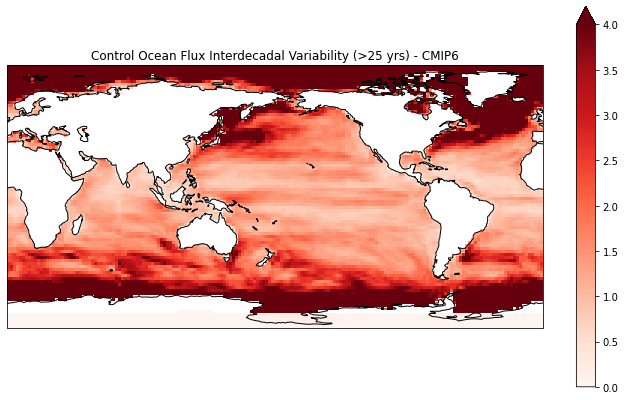

In [17]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ocean_flux_control_ensmean.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds', vmin=0, vmax=4)
ax.coastlines(color='black', linewidth=1)
plt.title('Control Ocean Flux Interdecadal Variability (>25 yrs) - CMIP6')

Text(0.5, 1.0, 'Control Ocean Flux Interdecadal Variability (>25 yrs) - CMIP6')

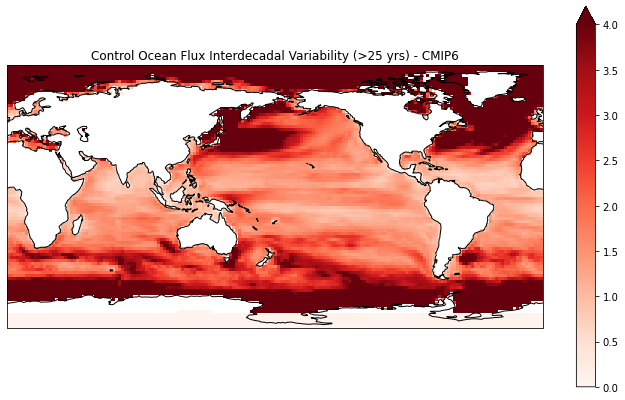

In [6]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ocean_flux_control_ensmean.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds', vmin=0, vmax=4)
ax.coastlines(color='black', linewidth=1)
plt.title('Control Ocean Flux Interdecadal Variability (>25 yrs) - CMIP6')

# Yearly averaged mlotst

In [7]:
mlotst_control_yearly = mlotst_control.rolling(time=12).mean('time')
mlotst_control_yearly

<xarray.DataArray (name: 9, time: 1500, lat: 88, lon: 179)>
array([[[[        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         ...,
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan]],

        [[        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
...
         [49.50081027, 48.91272169, 48.32935017, ..., 51.68213008,
          51.17731154, 50.42730149],
         [51.53702283, 51.43947985, 51.35946155, ..., 52.35236021,
          52.05529424, 51.82579392],
         [52.16361896, 52.12317818, 52.08178939, ..., 52.34769913,
          52.28140861, 52.24013674]],

        [[        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         ...,
         [49.03599385, 48.41027369, 47.79339284, ..., 51.42944692,
          50.87114378, 50.04666718],
         [50.74146986, 50.61089883, 50.51052634, ..., 51.75963318,
          51.40156925, 51.12702062],
         [51.16969053, 51.11165224, 51.05143458, ..., 51.42787516,
          51.33553201, 51.27829238]]]])
Coordinates:
    latitude   (lat, lon) float32 nan nan nan nan nan ... 86.99 86.92 86.8 86.61
    longitude  (lat, lon) float32 nan nan nan nan ... -5.602 2.988 11.02 18.28
  * time       (time) datetime64[ns] 1851-01-31 1851-02-28 ... 1975-12-31
  * lat        (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon        (lon) int64 1 3 5 7 9 11 13 15 ... 345 347 349 351 353 355 357
  * name       (name) object 'GFDL-CM4' 'GFDL-ESM4' ... 'CESM2-WACCM'
Attributes:
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Ocean Mixed Layer Thickness Defined by Sigma T
    original_name:  mlotst
    standard_name:  ocean_mixed_layer_thickness_defined_by_sigma_t
    units:          m

In [7]:
new_time_index=pd.date_range(start='1851-01-01',freq='M',periods=1500)

density = 1026 #Water density - kg/m3
c_p = 3850 #Specific heat of salt water - J/kgC
seconds = 2600000 #Time in a month - seconds

sst_control = sst_control.isel(time=slice(0,1500))

ocean_flux_control_yearlymean = xr.DataArray(np.zeros((1500,9,88,179)), dims=['time','name','lat','lon'])
for t in range(1,len(sst_control['time'].values)):
    i = 0
    for model in sst_control['name'].values:
        ocean_flux_control_yearlymean[t,i,:,:] = density*c_p*mlotst_control_yearly.isel(time=t).sel(name=model)*(sst_control.isel(time=t).sel(name=model) - 
                                                                                                 sst_control.isel(time=t-1).sel(name=model))/seconds \
                                   - surface_control.isel(time=t).sel(name=model)
        i += 1
    if t%300==0:
        print(t)
        
ocean_flux_control_yearlymean.coords['lon'] = sst_control['lon'].values
ocean_flux_control_yearlymean.coords['lat'] = sst_control['lat'].values
ocean_flux_control_yearlymean.coords['time'] = new_time_index
ocean_flux_control_yearlymean.coords['name'] = sst_control['name'].values
ocean_flux_control_yearlymean

300
600
900
1200


<xarray.DataArray (time: 1500, name: 9, lat: 88, lon: 179)>
array([[[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
...
         [-5.58307785e+02, -5.74227172e+02, -5.20893121e+02, ...,
          -2.98934765e+02, -3.16064444e+02, -3.99807490e+02],
         [-8.01198412e+02, -7.83911254e+02, -7.63148522e+02, ...,
          -4.08524368e+02, -5.09068615e+02, -6.21454081e+02],
         [-7.37130216e+02, -7.36861823e+02, -7.26877340e+02, ...,
          -6.45812341e+02, -6.89915176e+02, -7.22568816e+02]],

        [[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         ...,
         [-9.14885022e+02, -9.21710394e+02, -9.29352662e+02, ...,
          -8.14458370e+02, -8.49298382e+02, -8.75665753e+02],
         [-1.01622385e+03, -1.03651753e+03, -1.05323860e+03, ...,
          -9.31195219e+02, -9.53217670e+02, -9.76774824e+02],
         [-1.02367633e+03, -1.04099520e+03, -1.05938355e+03, ...,
          -9.38602076e+02, -9.60844108e+02, -9.87469107e+02]]]])
Coordinates:
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * time     (time) datetime64[ns] 1851-01-31 1851-02-28 ... 1975-12-31
  * name     (name) object 'GFDL-CM4' 'GFDL-ESM4' ... 'CESM2-WACCM'

In [8]:
ocean_flux_control_yearlymean.to_netcdf('/data/keeling/a/mailes2/a/processed_var_data/ocean_flux_control_yearlymean.nc')

In [9]:
ocean_flux_control_yearly_rolling = ocean_flux_control_yearlymean.rolling(time=300, center=True).mean('time')
ocean_flux_control_var_yearly = ocean_flux_control_yearly_rolling.std('time')
ocean_flux_control_ensmean_yearly = ocean_flux_control_var_yearly.mean('name')
ocean_flux_control_ensmean_yearly

<xarray.DataArray (lat: 88, lon: 179)>
array([[0.00871405, 0.00868801, 0.00830149, ..., 0.0072363 , 0.0083391 ,
        0.00870525],
       [0.00764501, 0.00767607, 0.00846349, ..., 0.00911185, 0.00898846,
        0.00770079],
       [0.01187237, 0.01069455, 0.00915673, ..., 0.01451618, 0.01451618,
        0.01227674],
       ...,
       [0.9528778 , 0.92203545, 0.90729027, ..., 1.08529675, 1.06293779,
        1.0203852 ],
       [0.94516814, 0.917784  , 0.92364166, ..., 0.93627096, 0.93427003,
        0.93133987],
       [1.04355461, 1.02259246, 1.03092385, ..., 0.97569418, 0.98588883,
        0.98844354]])
Coordinates:
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87

Text(0.5, 1.0, 'Control Ocean Flux Interdecadal Variability - Using yearly mean mlotst (>25 yrs) - CMIP6')

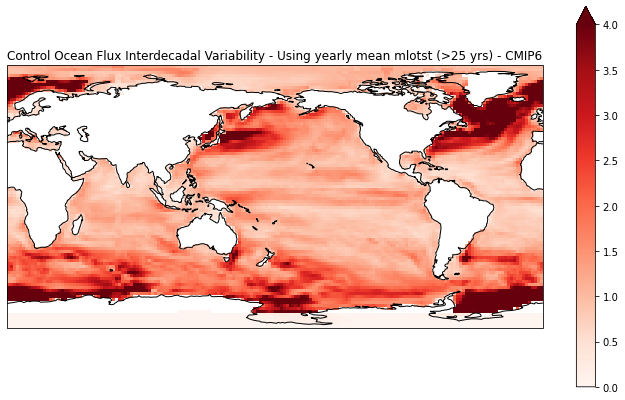

In [11]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ocean_flux_control_ensmean_yearly.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds', vmin=0, vmax=4)
ax.coastlines(color='black', linewidth=1)
plt.title('Control Ocean Flux Interdecadal Variability - Using yearly mean mlotst (>25 yrs) - CMIP6')

In [8]:
sst_control_yearly = sst_control.rolling(time=12).mean('time')
sst_control_yearly

<xarray.DataArray (name: 9, time: 1800, lat: 88, lon: 179)>
array([[[[         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         ...,
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan]],

        [[         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
...
         [257.30375039, 257.5047499 , 257.68557305, ..., 256.34631102,
          256.54463748, 256.81227891],
         [256.38621367, 256.45968018, 256.5067677 , ..., 256.07953256,
          256.17209608, 256.2461719 ],
         [255.6484101 , 255.6763404 , 255.70339269, ..., 255.59283678,
          255.59888388, 255.60401408]],

        [[223.60234901, 223.31740623, 223.22338797, ..., 224.52673529,
          224.3618244 , 224.18573274],
         [224.46721807, 224.07061116, 223.72823864, ..., 226.17331811,
          225.72867401, 225.3288183 ],
         [227.76423856, 227.22395609, 226.64795026, ..., 230.01646628,
          229.50038437, 228.97572434],
         ...,
         [257.1587266 , 257.35811066, 257.5386101 , ..., 256.20879726,
          256.40513078, 256.6667865 ],
         [256.36381207, 256.44203794, 256.49571889, ..., 256.04717373,
          256.13838581, 256.21728451],
         [255.64333592, 255.67501698, 255.70673845, ..., 255.57126844,
          255.58167926, 255.59151775]]]])
Coordinates:
  * time     (time) datetime64[ns] 1851-01-31 1851-02-28 ... 2000-12-31
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * name     (name) object 'GFDL-CM4' 'GFDL-ESM4' ... 'CESM2-WACCM'
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Surface Temperature
    original_name:  ts
    standard_name:  surface_temperature
    units:          K

# Chain Rule with Yearly Averages

In [14]:
new_time_index=pd.date_range(start='1851-01-01',freq='M',periods=1500)

density = 1026 #Water density - kg/m3
c_p = 3850 #Specific heat of salt water - J/kgC
seconds = 2600000 #Time in a month - seconds

sst_control = sst_control.isel(time=slice(0,1500))

ocean_flux_control_chain = xr.DataArray(np.zeros((1500,9,88,179)), dims=['time','name','lat','lon'])
for t in range(1,len(sst_control['time'].values)):
    i = 0
    for model in sst_control['name'].values:
        ocean_flux_control_chain[t,i,:,:] = density*c_p*mlotst_control_yearly.isel(time=t).sel(name=model)*(sst_control.isel(time=t).sel(name=model) - 
                                                                                                 sst_control.isel(time=t-1).sel(name=model))/seconds + \
                                                 density*c_p*sst_control_yearly.isel(time=t).sel(name=model)*(mlotst_control.isel(time=t).sel(name=model) - 
                                                                                                 mlotst_control.isel(time=t-1).sel(name=model))/seconds \
                                   - surface_control.isel(time=t).sel(name=model)
        i += 1
    if t%300==0:
        print(t)
        
ocean_flux_control_chain.coords['lon'] = sst_control['lon'].values
ocean_flux_control_chain.coords['lat'] = sst_control['lat'].values
ocean_flux_control_chain.coords['time'] = new_time_index
ocean_flux_control_chain.coords['name'] = sst_control['name'].values
ocean_flux_control_chain

300
600
900
1200


<xarray.DataArray (time: 1500, name: 9, lat: 88, lon: 179)>
array([[[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
...
         [ 7.72903031e+02,  7.08013272e+02,  6.80695495e+02, ...,
           9.35456722e+02,  8.43064620e+02,  8.91072959e+02],
         [-3.11695337e+01, -2.41829231e+01, -8.94564135e+00, ...,
           8.92495084e+01, -4.17581755e+01, -9.13210908e+01],
         [-6.59282528e+01, -2.20172069e+01,  3.01729317e+01, ...,
          -3.05079132e+01, -1.00024286e+02, -1.30693631e+02]],

        [[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         ...,
         [ 5.05522954e+03,  5.08088559e+03,  5.10705506e+03, ...,
           4.50792382e+03,  4.79275516e+03,  4.95436858e+03],
         [ 3.63510894e+03,  3.66363396e+03,  3.70082055e+03, ...,
           3.37884687e+03,  3.47683336e+03,  3.55418897e+03],
         [ 2.73216960e+03,  2.72155065e+03,  2.69799684e+03, ...,
           2.74746291e+03,  2.74341081e+03,  2.73602375e+03]]]])
Coordinates:
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * time     (time) datetime64[ns] 1851-01-31 1851-02-28 ... 1975-12-31
  * name     (name) object 'GFDL-CM4' 'GFDL-ESM4' ... 'CESM2-WACCM'

In [15]:
ocean_flux_control_chain_rolling = ocean_flux_control_chain.rolling(time=300, center=True).mean('time')
ocean_flux_control_var_chain = ocean_flux_control_chain_rolling.std('time')
ocean_flux_control_ensmean_chain = ocean_flux_control_var_chain.mean('name')
ocean_flux_control_ensmean_chain

<xarray.DataArray (lat: 88, lon: 179)>
array([[8.71405130e-03, 8.68801117e-03, 8.30149350e-03, ...,
        7.23630036e-03, 8.33910462e-03, 8.70525463e-03],
       [7.64501128e-03, 7.67607336e-03, 8.46348560e-03, ...,
        9.11185406e-03, 8.98846220e-03, 7.70078890e-03],
       [1.18723745e-02, 1.06945501e-02, 9.15673361e-03, ...,
        1.45161833e-02, 1.45161833e-02, 1.22767366e-02],
       ...,
       [1.10411669e+01, 1.05446966e+01, 1.01334759e+01, ...,
        1.34153988e+01, 1.29740020e+01, 1.23550086e+01],
       [1.15723105e+01, 1.13104967e+01, 1.15673879e+01, ...,
        1.15928961e+01, 1.15810606e+01, 1.15391630e+01],
       [1.38215981e+01, 1.35330619e+01, 1.38051875e+01, ...,
        1.28553853e+01, 1.30318315e+01, 1.30124380e+01]])
Coordinates:
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87

Text(0.5, 1.0, 'Control Ocean Flux Interdecadal Variability - Using chain rule (>25 yrs) - CMIP6')

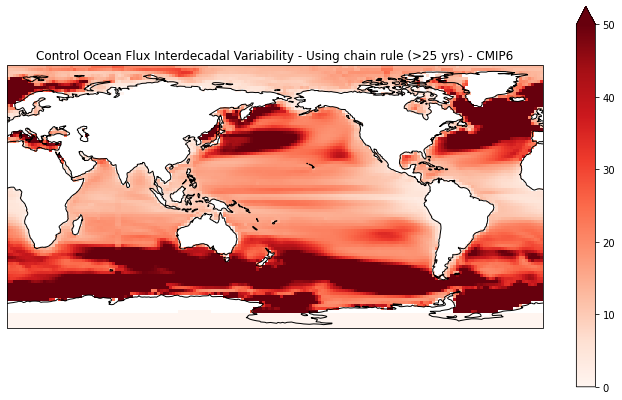

In [23]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ocean_flux_control_ensmean_chain.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds', vmin=0, vmax=50)
ax.coastlines(color='black', linewidth=1)
plt.title('Control Ocean Flux Interdecadal Variability - Using chain rule (>25 yrs) - CMIP6')

# Historical

In [9]:
surface_hist

<xarray.DataArray (name: 9, time: 1500, lat: 88, lon: 179)>
array([[[[ 4.90165056e+00,  5.02030481e+00,  5.14833517e+00, ...,
           4.42925605e+00,  4.56485558e+00,  4.66646627e+00],
         [ 4.59733384e+00,  4.82168076e+00,  4.98723783e+00, ...,
           3.81284670e+00,  3.96564983e+00,  4.19904078e+00],
         [ 4.02822119e+00,  4.18452456e+00,  4.37871187e+00, ...,
           3.16195200e+00,  3.32776068e+00,  3.54453707e+00],
         ...,
         [-3.46124473e+01, -3.68575683e+01, -3.48434307e+01, ...,
          -3.44554857e+01, -3.57958553e+01, -3.51358641e+01],
         [-3.32735436e+01, -3.38893754e+01, -3.38385741e+01, ...,
          -3.26756667e+01, -3.27437460e+01, -3.27906597e+01],
         [-3.46177860e+01, -3.51192427e+01, -3.58445793e+01, ...,
          -3.36690564e+01, -3.51623532e+01, -3.55597275e+01]],

        [[-2.86197465e+00, -2.93874279e+00, -3.03927916e+00, ...,
          -2.56575976e+00, -2.67832265e+00, -2.74031600e+00],
         [-2.12785747e+00, -2.32005957e+00, -2.40554916e+00, ...,
          -1.76238901e+00, -1.80849465e+00, -1.92474648e+00],
         [-1.41721594e+00, -1.48068312e+00, -1.55627523e+00, ...,
          -9.75113796e-01, -1.02866159e+00, -1.15787975e+00],
...
         [-4.22657914e+01, -4.27121239e+01, -4.25050988e+01, ...,
          -4.14794275e+01, -4.14537856e+01, -4.16859040e+01],
         [-4.16607946e+01, -4.18207167e+01, -4.15129903e+01, ...,
          -4.08408854e+01, -4.07483856e+01, -4.08952654e+01],
         [-4.09747304e+01, -4.15050773e+01, -4.12692748e+01, ...,
          -3.93983996e+01, -3.99012588e+01, -4.01739465e+01]],

        [[ 3.72216024e+00,  3.72758932e+00,  3.73674215e+00, ...,
           3.69827086e+00,  3.70587259e+00,  3.71236349e+00],
         [ 3.78478374e+00,  3.80151044e+00,  3.80537598e+00, ...,
           3.69636811e+00,  3.71102061e+00,  3.73913749e+00],
         [ 3.62171032e+00,  3.63325908e+00,  3.67212569e+00, ...,
           3.65140738e+00,  3.64544715e+00,  3.62874548e+00],
         ...,
         [-2.50812586e+01, -2.53460143e+01, -2.53195316e+01, ...,
          -2.65939754e+01, -2.71630297e+01, -2.63456181e+01],
         [-2.66460704e+01, -2.65967282e+01, -2.59333669e+01, ...,
          -2.72300927e+01, -2.67794278e+01, -2.68775401e+01],
         [-2.90347791e+01, -2.92975723e+01, -2.93255644e+01, ...,
          -2.95780620e+01, -3.00762300e+01, -3.00066347e+01]]]])
Coordinates:
  * time     (time) datetime64[ns] 1851-01-31 1851-02-28 ... 1975-12-31
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * name     (name) object 'BCC-CSM2-MR/historical/r1i1p1f1/hfls_Amon_BCC-CSM...

In [12]:
surface_hist = surface_hist.to_dataset('name').rename_vars({'BCC-CSM2-MR/historical/r1i1p1f1/hfls_Amon_BCC-CSM2-MR_historical_r1i1p1f1_gn_185001-201412.nc':'BCC-CSM2-MR',
                                                            'BCC-ESM1/historical/r1i1p1f1/hfls_Amon_BCC-ESM1_historical_r1i1p1f1_gn_185001-201412.nc':'BCC-ESM1',
                                                            'CESM2/historical/r10i1p1f1/hfls_Amon_CESM2_historical_r10i1p1f1_gn_185001-201412.nc':'CESM2',
                                                            'CNRM-CM6-1/historical/r10i1p1f2/hfls_Amon_CNRM-CM6-1_historical_r10i1p1f2_gr_185001-201412.nc':'CNRM-CM6-1',
                                                            'CNRM-ESM2-1/historical/r10i1p1f2/hfls_Amon_CNRM-ESM2-1_historical_r10i1p1f2_gr_185001-201412.nc':'CNRM-ESM2-1',
                                                            'CanESM5/historical/r10i1p1f1/hfls_Amon_CanESM5_historical_r10i1p1f1_gn_185001-201412.nc':'CanESM5',
                                                            'EC-Earth3/historical/r10i1p1f1/hfls_Amon_EC-Earth3_historical_r10i1p1f1_gr_185001-201412.nc':'EC-Earth3',
                                                            'GISS-E2-1-G/historical/r101i1p1f1/hfls_Amon_GISS-E2-1-G_historical_r101i1p1f1_gn_185001-201412.nc':'GISS-E2-1-G',
                                                            'IPSL-CM6A-LR/historical/r10i1p1f1/hfls_Amon_IPSL-CM6A-LR_historical_r10i1p1f1_gr_185001-201412.nc':'IPSL-CM6A-LR'}).to_array('name')
surface_hist

<xarray.DataArray (name: 9, time: 1500, lat: 88, lon: 179)>
array([[[[ 4.90165056e+00,  5.02030481e+00,  5.14833517e+00, ...,
           4.42925605e+00,  4.56485558e+00,  4.66646627e+00],
         [ 4.59733384e+00,  4.82168076e+00,  4.98723783e+00, ...,
           3.81284670e+00,  3.96564983e+00,  4.19904078e+00],
         [ 4.02822119e+00,  4.18452456e+00,  4.37871187e+00, ...,
           3.16195200e+00,  3.32776068e+00,  3.54453707e+00],
         ...,
         [-3.46124473e+01, -3.68575683e+01, -3.48434307e+01, ...,
          -3.44554857e+01, -3.57958553e+01, -3.51358641e+01],
         [-3.32735436e+01, -3.38893754e+01, -3.38385741e+01, ...,
          -3.26756667e+01, -3.27437460e+01, -3.27906597e+01],
         [-3.46177860e+01, -3.51192427e+01, -3.58445793e+01, ...,
          -3.36690564e+01, -3.51623532e+01, -3.55597275e+01]],

        [[-2.86197465e+00, -2.93874279e+00, -3.03927916e+00, ...,
          -2.56575976e+00, -2.67832265e+00, -2.74031600e+00],
         [-2.12785747e+00, -2.32005957e+00, -2.40554916e+00, ...,
          -1.76238901e+00, -1.80849465e+00, -1.92474648e+00],
         [-1.41721594e+00, -1.48068312e+00, -1.55627523e+00, ...,
          -9.75113796e-01, -1.02866159e+00, -1.15787975e+00],
...
         [-4.22657914e+01, -4.27121239e+01, -4.25050988e+01, ...,
          -4.14794275e+01, -4.14537856e+01, -4.16859040e+01],
         [-4.16607946e+01, -4.18207167e+01, -4.15129903e+01, ...,
          -4.08408854e+01, -4.07483856e+01, -4.08952654e+01],
         [-4.09747304e+01, -4.15050773e+01, -4.12692748e+01, ...,
          -3.93983996e+01, -3.99012588e+01, -4.01739465e+01]],

        [[ 3.72216024e+00,  3.72758932e+00,  3.73674215e+00, ...,
           3.69827086e+00,  3.70587259e+00,  3.71236349e+00],
         [ 3.78478374e+00,  3.80151044e+00,  3.80537598e+00, ...,
           3.69636811e+00,  3.71102061e+00,  3.73913749e+00],
         [ 3.62171032e+00,  3.63325908e+00,  3.67212569e+00, ...,
           3.65140738e+00,  3.64544715e+00,  3.62874548e+00],
         ...,
         [-2.50812586e+01, -2.53460143e+01, -2.53195316e+01, ...,
          -2.65939754e+01, -2.71630297e+01, -2.63456181e+01],
         [-2.66460704e+01, -2.65967282e+01, -2.59333669e+01, ...,
          -2.72300927e+01, -2.67794278e+01, -2.68775401e+01],
         [-2.90347791e+01, -2.92975723e+01, -2.93255644e+01, ...,
          -2.95780620e+01, -3.00762300e+01, -3.00066347e+01]]]])
Coordinates:
  * time     (time) datetime64[ns] 1851-01-31 1851-02-28 ... 1975-12-31
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * name     (name) object 'BCC-CSM2-MR' 'BCC-ESM1' ... 'IPSL-CM6A-LR'

In [10]:
mlotst_hist

<xarray.DataArray (name: 9, time: 1500, lat: 88, lon: 179)>
array([[[[  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         ...,
         [ 17.01635361,  16.03998375,  16.32410812, ...,  26.29211617,
           24.24300957,  21.25788116],
         [ 14.95782566,  15.11154652,  15.32291794, ...,  17.31301689,
           16.03644562,  15.49049759],
         [ 14.66462231,  14.5903511 ,  14.50779343, ...,  15.34755516,
           15.03311539,  14.81964779]],

        [[  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
...
         [ 35.66253281,  33.57178497,  29.40210724, ...,  37.47640228,
           37.74918365,  37.86175919],
         [ 31.98886681,  31.23908234,  30.41943932, ...,  33.80157471,
           33.67768097,  33.21307755],
         [ 33.49114227,  33.46652985,  33.4388504 , ...,  33.54363251,
           33.54611588,  33.53768158]],

        [[  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         ...,
         [ 35.51063919,  30.17873192,  25.40619659, ...,  43.23965836,
           43.46556854,  42.64061737],
         [ 35.92930222,  35.87836456,  35.80714798, ...,  36.84175491,
           36.46561813,  36.28324127],
         [ 42.51741028,  42.43287277,  42.36470032, ...,  42.71250916,
           42.69617462,  42.6608429 ]]]])
Coordinates:
    latitude   (lat, lon) float64 nan nan nan nan nan ... 86.99 86.92 86.8 86.61
    longitude  (lat, lon) float64 nan nan nan nan ... -5.602 2.988 11.02 18.28
  * time       (time) datetime64[ns] 1851-01-31 1851-02-28 ... 1975-12-31
  * lat        (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon        (lon) int64 1 3 5 7 9 11 13 15 ... 345 347 349 351 353 355 357
  * name       (name) object '.CMIP.IPSL.IPSL-CM6A-LR.historical.r8i1p1f1.Omo...

In [13]:
mlotst_hist = mlotst_hist.to_dataset('name').rename_vars({'.CMIP.IPSL.IPSL-CM6A-LR.historical.r8i1p1f1.Omon.mlotst.gn.v20180803':'IPSL-CM6A-LR',
                                                          '.CMIP.NASA-GISS.GISS-E2-1-G.historical.r1i1p1f1.Omon.mlotst.gn.v20180827':'GISS-E2-1-G',
                                                          '.CMIP.CNRM-CERFACS.CNRM-CM6-1.historical.r1i1p1f2.Omon.mlotst.gn.v20180917':'CNRM-CM6-1',
                                                          '.CMIP.BCC.BCC-CSM2-MR.historical.r2i1p1f1.Omon.mlotst.gn.v20181031':'BCC-CSM2-MR',
                                                          '.CMIP.BCC.BCC-ESM1.historical.r1i1p1f1.Omon.mlotst.gn.v20181129':'BCC-ESM1',
                                                          '.CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.r1i1p1f2.Omon.mlotst.gn.v20181206':'CNRM-ESM2-1',
                                                          '.CMIP.NCAR.CESM2.historical.r2i1p1f1.Omon.mlotst.gn.v20190308':'CESM2',
                                                          '.CMIP.EC-Earth-Consortium.EC-Earth3.historical.r2i1p1f1.Omon.mlotst.gn.v20190408':'EC-Earth3',
                                                          '.CMIP.CCCma.CanESM5.historical.r11i1p1f1.Omon.mlotst.gn.v20190429':'CanESM5'}).to_array('name')
mlotst_hist

<xarray.DataArray (name: 9, time: 1500, lat: 88, lon: 179)>
array([[[[  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         ...,
         [ 17.01635361,  16.03998375,  16.32410812, ...,  26.29211617,
           24.24300957,  21.25788116],
         [ 14.95782566,  15.11154652,  15.32291794, ...,  17.31301689,
           16.03644562,  15.49049759],
         [ 14.66462231,  14.5903511 ,  14.50779343, ...,  15.34755516,
           15.03311539,  14.81964779]],

        [[  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
...
         [ 35.66253281,  33.57178497,  29.40210724, ...,  37.47640228,
           37.74918365,  37.86175919],
         [ 31.98886681,  31.23908234,  30.41943932, ...,  33.80157471,
           33.67768097,  33.21307755],
         [ 33.49114227,  33.46652985,  33.4388504 , ...,  33.54363251,
           33.54611588,  33.53768158]],

        [[  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         ...,
         [ 35.51063919,  30.17873192,  25.40619659, ...,  43.23965836,
           43.46556854,  42.64061737],
         [ 35.92930222,  35.87836456,  35.80714798, ...,  36.84175491,
           36.46561813,  36.28324127],
         [ 42.51741028,  42.43287277,  42.36470032, ...,  42.71250916,
           42.69617462,  42.6608429 ]]]])
Coordinates:
    latitude   (lat, lon) float64 nan nan nan nan nan ... 86.99 86.92 86.8 86.61
    longitude  (lat, lon) float64 nan nan nan nan ... -5.602 2.988 11.02 18.28
  * time       (time) datetime64[ns] 1851-01-31 1851-02-28 ... 1975-12-31
  * lat        (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon        (lon) int64 1 3 5 7 9 11 13 15 ... 345 347 349 351 353 355 357
  * name       (name) object 'IPSL-CM6A-LR' 'GISS-E2-1-G' ... 'CanESM5'

In [11]:
sst_hist

<xarray.DataArray 'ts' (name: 9, time: 1500, lat: 88, lon: 179)>
array([[[[245.1859862 , 245.05620307, 244.92043969, ..., 245.75533118,
          245.6111197 , 245.45203602],
         [245.88063364, 245.58245054, 245.37763481, ..., 247.19417147,
          246.82641607, 246.45907957],
         [248.01682291, 247.3577596 , 246.7102842 , ..., 250.3653935 ,
          249.80158043, 249.32374638],
         ...,
         [245.06593436, 245.39194295, 245.63474012, ..., 241.69775934,
          242.72476049, 243.74282717],
         [242.68845289, 243.00853387, 243.20048054, ..., 241.26501357,
          241.50763409, 241.96129718],
         [241.32728171, 241.53171362, 241.72946795, ..., 240.6040532 ,
          240.76747683, 240.98713307]],

        [[233.05632464, 232.91759595, 232.7670064 , ..., 233.7315024 ,
          233.52934174, 233.37129233],
         [233.43740169, 233.17238575, 232.67125688, ..., 235.19431216,
          234.55833563, 234.25745403],
         [237.49387496, 236.81338542, 236.08487523, ..., 239.89354951,
          239.37231635, 238.98301092],
...
         [253.5345807 , 253.62416859, 253.69687856, ..., 252.92499209,
          253.30769977, 253.40706583],
         [252.19553908, 252.21278911, 252.23002734, ..., 252.18424604,
          252.13351638, 252.15487338],
         [250.74838405, 250.75130838, 250.75423612, ..., 250.80454796,
          250.78808492, 250.7716162 ]],

        [[238.65758206, 238.53384663, 238.41010391, ..., 239.38124703,
          239.19216301, 239.00308465],
         [238.65255689, 238.40425581, 238.15596025, ..., 239.97529907,
          239.60325604, 239.27263674],
         [240.91002447, 240.37961032, 239.84836888, ..., 242.76911442,
          242.38854589, 241.9071123 ],
         ...,
         [248.88179831, 249.23645723, 249.55722985, ..., 247.64610281,
          247.93472235, 248.24773801],
         [248.91423681, 249.04374118, 249.17324417, ..., 248.24221544,
          248.36503936, 248.55882082],
         [248.6031107 , 248.60378665, 248.60446968, ..., 248.54380519,
          248.56065276, 248.5774984 ]]]])
Coordinates:
  * time     (time) datetime64[ns] 1851-01-31 1851-02-28 ... 1975-12-31
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * name     (name) object 'CMIP.IPSL.IPSL-CM6A-LR.historical.r2i1p1f1.Amon.t...
Attributes:
    cell_measures:       area: areacella
    cell_methods:        area: time: mean
    description:         Surface temperature (skin for open ocean)
    history:             none
    interval_operation:  900 s
    interval_write:      1 month
    long_name:           Surface Temperature
    online_operation:    average
    standard_name:       surface_temperature
    units:               K

In [14]:
sst_hist = sst_hist.to_dataset('name').rename_vars({'CMIP.IPSL.IPSL-CM6A-LR.historical.r2i1p1f1.Amon.ts.gr.v20180803':'IPSL-CM6A-LR',
                                                    'CMIP.NASA-GISS.GISS-E2-1-G.historical.r2i1p1f1.Amon.ts.gn.v20180827':'GISS-E2-1-G',
                                                    'CMIP.CNRM-CERFACS.CNRM-CM6-1.historical.r1i1p1f2.Amon.ts.gr.v20180917':'CNRM-CM6-1',
                                                    'CMIP.BCC.BCC-CSM2-MR.historical.r2i1p1f1.Amon.ts.gn.v20181115':'BCC-CSM2-MR',
                                                    'CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.r1i1p1f2.Amon.ts.gr.v20181206':'CNRM-ESM2-1',
                                                    'CMIP.BCC.BCC-ESM1.historical.r2i1p1f1.Amon.ts.gn.v20181214':'BCC-ESM1',
                                                    'CMIP.NCAR.CESM2.historical.r1i1p1f1.Amon.ts.gn.v20190308':'CESM2',
                                                    'CMIP.CCCma.CanESM5.historical.r11i1p1f1.Amon.ts.gn.v20190429':'CanESM5',
                                                    'CMIP.EC-Earth-Consortium.EC-Earth3.historical.r9i1p1f1.Amon.ts.gr.v20200201':'EC-Earth3'}).to_array('name')

In [14]:
sst_hist

<xarray.DataArray (name: 9, time: 1500, lat: 88, lon: 179)>
array([[[[245.1859862 , 245.05620307, 244.92043969, ..., 245.75533118,
          245.6111197 , 245.45203602],
         [245.88063364, 245.58245054, 245.37763481, ..., 247.19417147,
          246.82641607, 246.45907957],
         [248.01682291, 247.3577596 , 246.7102842 , ..., 250.3653935 ,
          249.80158043, 249.32374638],
         ...,
         [245.06593436, 245.39194295, 245.63474012, ..., 241.69775934,
          242.72476049, 243.74282717],
         [242.68845289, 243.00853387, 243.20048054, ..., 241.26501357,
          241.50763409, 241.96129718],
         [241.32728171, 241.53171362, 241.72946795, ..., 240.6040532 ,
          240.76747683, 240.98713307]],

        [[233.05632464, 232.91759595, 232.7670064 , ..., 233.7315024 ,
          233.52934174, 233.37129233],
         [233.43740169, 233.17238575, 232.67125688, ..., 235.19431216,
          234.55833563, 234.25745403],
         [237.49387496, 236.81338542, 236.08487523, ..., 239.89354951,
          239.37231635, 238.98301092],
...
         [253.5345807 , 253.62416859, 253.69687856, ..., 252.92499209,
          253.30769977, 253.40706583],
         [252.19553908, 252.21278911, 252.23002734, ..., 252.18424604,
          252.13351638, 252.15487338],
         [250.74838405, 250.75130838, 250.75423612, ..., 250.80454796,
          250.78808492, 250.7716162 ]],

        [[238.65758206, 238.53384663, 238.41010391, ..., 239.38124703,
          239.19216301, 239.00308465],
         [238.65255689, 238.40425581, 238.15596025, ..., 239.97529907,
          239.60325604, 239.27263674],
         [240.91002447, 240.37961032, 239.84836888, ..., 242.76911442,
          242.38854589, 241.9071123 ],
         ...,
         [248.88179831, 249.23645723, 249.55722985, ..., 247.64610281,
          247.93472235, 248.24773801],
         [248.91423681, 249.04374118, 249.17324417, ..., 248.24221544,
          248.36503936, 248.55882082],
         [248.6031107 , 248.60378665, 248.60446968, ..., 248.54380519,
          248.56065276, 248.5774984 ]]]])
Coordinates:
  * time     (time) datetime64[ns] 1851-01-31 1851-02-28 ... 1975-12-31
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * name     (name) object 'IPSL-CM6A-LR' 'GISS-E2-1-G' ... 'EC-Earth3'
Attributes:
    cell_measures:       area: areacella
    cell_methods:        area: time: mean
    description:         Surface temperature (skin for open ocean)
    history:             none
    interval_operation:  900 s
    interval_write:      1 month
    long_name:           Surface Temperature
    online_operation:    average
    standard_name:       surface_temperature
    units:               K

In [12]:
new_time_index=pd.date_range(start='1851-01-01',freq='M',periods=1500)

density = 1026 #Water density - kg/m3
c_p = 3850 #Specific heat of salt water - J/kgC
seconds = 2600000 #Time in a month - seconds

ocean_flux_hist = xr.DataArray(np.zeros((1500,9,88,179)), dims=['time','name','lat','lon'])
for t in range(1,len(sst_hist['time'].values)):
    i = 0
    for model in sst_hist['name'].values:
        ocean_flux_hist[t,i,:,:] = density*c_p*mlotst_hist.isel(time=t).sel(name=model)*(sst_hist.isel(time=t).sel(name=model) -
                                                                                         sst_hist.isel(time=t-1).sel(name=model))/seconds \
                                   - surface_hist.isel(time=t).sel(name=model)
        i += 1
    if t%300==0:
        print(t)
        
ocean_flux_hist.coords['lon'] = sst_hist['lon'].values
ocean_flux_hist.coords['lat'] = sst_hist['lat'].values
ocean_flux_hist.coords['time'] = new_time_index
ocean_flux_hist.coords['name'] = sst_hist['name'].values
ocean_flux_hist

300
600
900
1200


<xarray.DataArray (time: 1500, name: 9, lat: 88, lon: 179)>
array([[[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
...
         [-3.72364370e+02, -3.37570938e+02, -3.06830281e+02, ...,
          -3.69938915e+02, -3.85069090e+02, -3.95843422e+02],
         [-4.37391899e+02, -4.54188880e+02, -4.75115781e+02, ...,
          -3.75813212e+02, -3.89887374e+02, -4.07088913e+02],
         [-5.37353071e+02, -5.50264027e+02, -5.60677242e+02, ...,
          -4.82230126e+02, -4.95818456e+02, -5.10975769e+02]],

        [[-7.15127588e+00, -7.17544508e+00, -7.19953938e+00, ...,
          -7.01900230e+00, -7.05338505e+00, -7.08768180e+00],
         [-7.09303928e+00, -7.18291887e+00, -7.27283770e+00, ...,
          -6.71072006e+00, -6.79742267e+00, -6.89763858e+00],
         [-7.05300527e+00, -7.17045711e+00, -7.28742816e+00, ...,
          -6.54804259e+00, -6.66815613e+00, -6.79860768e+00],
         ...,
         [-1.61308705e+02, -1.44592885e+02, -1.34413314e+02, ...,
          -1.94769770e+02, -1.96659352e+02, -1.88590153e+02],
         [-1.06022143e+02, -9.88412029e+01, -9.27617527e+01, ...,
          -1.39612776e+02, -1.31027969e+02, -1.22683649e+02],
         [-3.96241346e+01, -3.84842441e+01, -3.72494463e+01, ...,
          -4.81284316e+01, -4.57977274e+01, -4.35754286e+01]]]])
Coordinates:
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * time     (time) datetime64[ns] 1851-01-31 1851-02-28 ... 1975-12-31
  * name     (name) object 'IPSL-CM6A-LR' 'GISS-E2-1-G' ... 'EC-Earth3'

In [13]:
ocean_flux_hist.to_netcdf('/data/keeling/a/mailes2/a/processed_var_data/ocean_flux_hist.nc')

In [17]:
ocean_flux_hist_rolling = ocean_flux_hist.rolling(time=300, center=True).mean('time')
ocean_flux_hist_var = ocean_flux_hist_rolling.std('time')
ocean_flux_hist_ensmean = ocean_flux_hist_var.mean('name')
ocean_flux_hist_ensmean

<xarray.DataArray (lat: 88, lon: 179)>
array([[9.20457506e-03, 9.17173340e-03, 9.16776870e-03, ...,
        8.85091972e-03, 9.15886615e-03, 9.19267015e-03],
       [9.05538096e-03, 8.97255482e-03, 8.99728185e-03, ...,
        9.46540370e-03, 9.42007748e-03, 9.08912600e-03],
       [1.13068175e-02, 1.08842513e-02, 1.06884808e-02, ...,
        1.15024875e-02, 1.13490774e-02, 1.12583065e-02],
       ...,
       [1.01977694e+01, 1.56874104e+01, 2.57531534e+01, ...,
        1.42431563e+01, 1.39668297e+01, 1.20029945e+01],
       [1.27754497e+01, 1.19773099e+01, 1.38851271e+01, ...,
        1.45874986e+01, 1.45209847e+01, 1.39383728e+01],
       [1.26450684e+01, 1.26695478e+01, 1.32667682e+01, ...,
        1.46766479e+01, 1.44039842e+01, 1.38737149e+01]])
Coordinates:
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87

Text(0.5, 1.0, 'Historical Ocean Flux Interdecadal Variability (>25 yrs) - CMIP6')

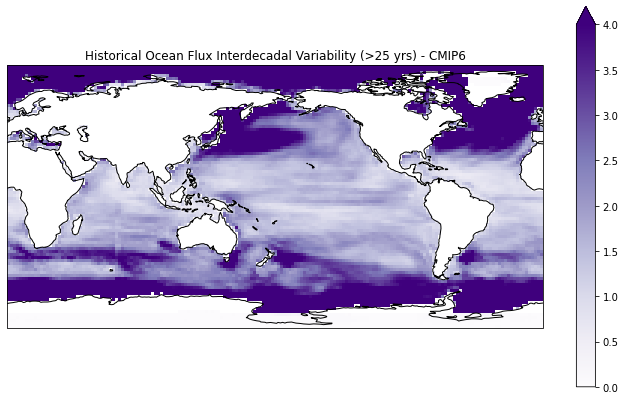

In [9]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ocean_flux_hist_ensmean.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Purples', vmin=0, vmax=4)
ax.coastlines(color='black', linewidth=1)
plt.title('Historical Ocean Flux Interdecadal Variability (>25 yrs) - CMIP6')

Text(0.5, 1.0, 'Historical Ocean Flux Interdecadal Variability (>25 yrs) - CMIP6')

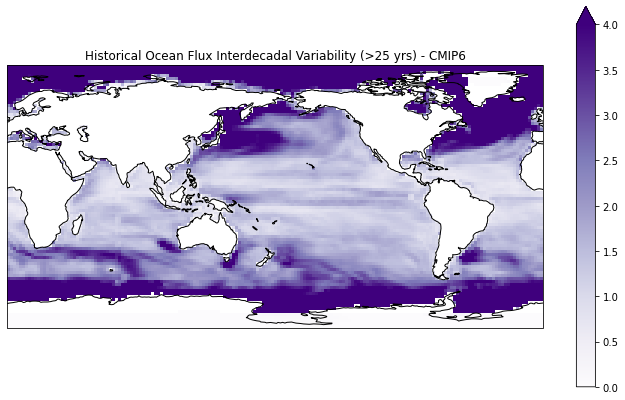

In [18]:
#Redone
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ocean_flux_hist_ensmean.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Purples', vmin=0, vmax=4)
ax.coastlines(color='black', linewidth=1)
plt.title('Historical Ocean Flux Interdecadal Variability (>25 yrs) - CMIP6')

# Historical Chain Rule Ocean Flux

In [17]:
new_time_index=pd.date_range(start='1851-01-01',freq='M',periods=1500)

density = 1026 #Water density - kg/m3
c_p = 3850 #Specific heat of salt water - J/kgC
seconds = 2600000 #Time in a month - seconds

ocean_flux_hist_chain = xr.DataArray(np.zeros((1500,9,88,179)), dims=['time','name','lat','lon'])
for t in range(1,len(sst_hist['time'].values)):
    i = 0
    for model in sst_hist['name'].values:
        ocean_flux_hist_chain[t,i,:,:] = density*c_p*mlotst_hist.isel(time=t).sel(name=model)*(sst_hist.isel(time=t).sel(name=model) - 
                                                                                                 sst_hist.isel(time=t-1).sel(name=model))/seconds + \
                                                 density*c_p*sst_hist.isel(time=t).sel(name=model)*(mlotst_hist.isel(time=t).sel(name=model) - 
                                                                                                 mlotst_hist.isel(time=t-1).sel(name=model))/seconds \
                                   - surface_hist.isel(time=t).sel(name=model)
        i += 1
    if t%300==0:
        print(t)
        
ocean_flux_hist_chain.coords['lon'] = sst_hist['lon'].values
ocean_flux_hist_chain.coords['lat'] = sst_hist['lat'].values
ocean_flux_hist_chain.coords['time'] = new_time_index
ocean_flux_hist_chain.coords['name'] = sst_hist['name'].values
ocean_flux_hist_chain

300
600
900
1200


<xarray.DataArray (time: 1500, name: 9, lat: 88, lon: 179)>
array([[[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
...
         [-4.28664525e+02, -1.59597307e+03, -1.78865661e+03, ...,
           1.75593492e+03,  1.72666653e+03,  1.37197014e+03],
         [ 1.00528323e+03,  1.24489097e+03,  1.49802575e+03, ...,
           7.36173373e+02,  6.30145111e+02,  7.16536477e+02],
         [ 2.74300629e+03,  2.70828725e+03,  2.68349539e+03, ...,
           2.85111404e+03,  2.83076385e+03,  2.80569752e+03]],

        [[-7.15127588e+00, -7.17544508e+00, -7.19953938e+00, ...,
          -7.01900230e+00, -7.05338505e+00, -7.08768180e+00],
         [-7.09303928e+00, -7.18291887e+00, -7.27283770e+00, ...,
          -6.71072006e+00, -6.79742267e+00, -6.89763858e+00],
         [-7.05300527e+00, -7.17045711e+00, -7.28742816e+00, ...,
          -6.54804259e+00, -6.66815613e+00, -6.79860768e+00],
         ...,
         [ 3.15645416e+03,  2.60183158e+03,  2.47829063e+03, ...,
           3.93134227e+03,  3.85899173e+03,  3.77448401e+03],
         [ 1.71490478e+03,  1.61908910e+03,  1.65033064e+03, ...,
           2.16671726e+03,  2.05905909e+03,  1.99491667e+03],
         [ 1.28934683e+03,  1.35239847e+03,  1.40731410e+03, ...,
           1.31531810e+03,  1.24122949e+03,  1.21486804e+03]]]])
Coordinates:
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * time     (time) datetime64[ns] 1851-01-31 1851-02-28 ... 1975-12-31
  * name     (name) object 'IPSL-CM6A-LR' 'GISS-E2-1-G' ... 'EC-Earth3'

In [18]:
ocean_flux_hist_chain_rolling = ocean_flux_hist_chain.rolling(time=300, center=True).mean('time')
ocean_flux_hist_chain_var = ocean_flux_hist_chain_rolling.std('time')
ocean_flux_hist_chain_ensmean = ocean_flux_hist_chain_var.mean('name')

Text(0.5, 1.0, 'Historical Ocean Flux Interdecadal Variability (>25 yrs) - CMIP6')

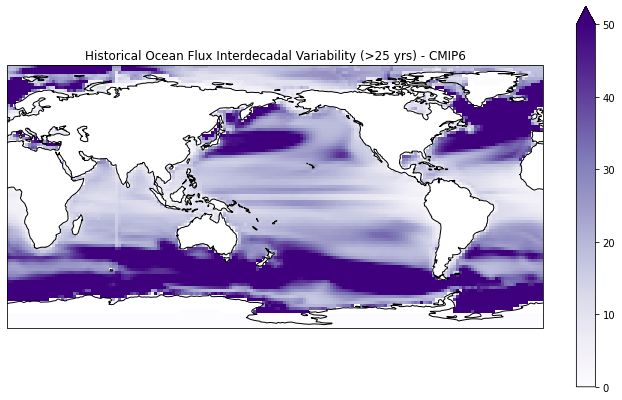

In [19]:
#Redone
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ocean_flux_hist_chain_ensmean.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Purples', vmin=0, vmax=50)
ax.coastlines(color='black', linewidth=1)
plt.title('Historical Ocean Flux Interdecadal Variability (>25 yrs) - CMIP6')

In [20]:
ocean_flux_hist_chain.to_netcdf('/data/keeling/a/mailes2/a/processed_var_data/ocean_flux_hist_chain.nc')

# Change in Fluxes

In [19]:
change_ocean_flux = ocean_flux_hist_ensmean - ocean_flux_control_ensmean

Text(0.5, 1.0, 'Change in Ocean Flux Interdecadal Variability (>25 yrs) - CMIP6')

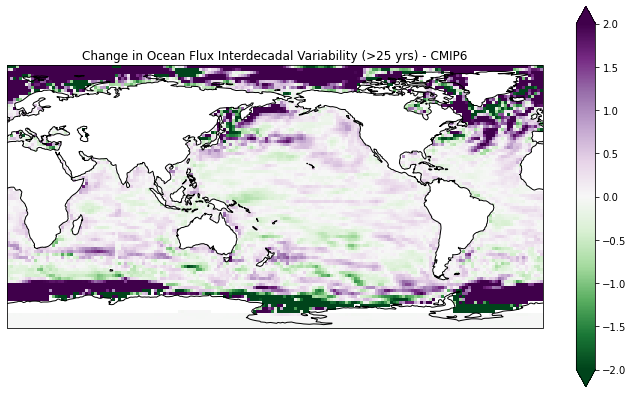

In [15]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
change_ocean_flux.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-2, vmax=2)
ax.coastlines(color='black', linewidth=1)
plt.title('Change in Ocean Flux Interdecadal Variability (>25 yrs) - CMIP6')

Text(0.5, 1.0, 'Change in Ocean Flux Interdecadal Variability (>25 yrs) - CMIP6')

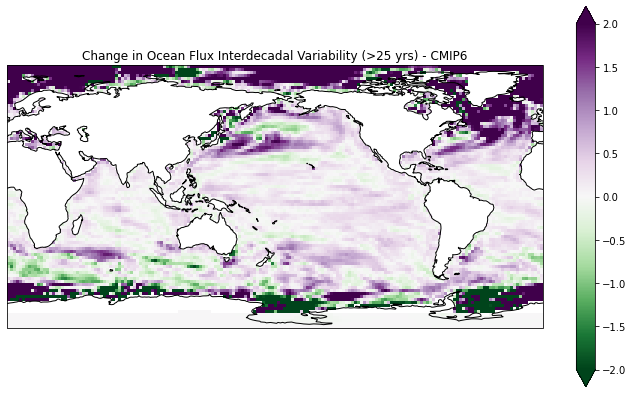

In [20]:
#Redone
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
change_ocean_flux.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-2, vmax=2)
ax.coastlines(color='black', linewidth=1)
plt.title('Change in Ocean Flux Interdecadal Variability (>25 yrs) - CMIP6')

In [21]:
percent_ocean_flux = change_ocean_flux*100/ocean_flux_control_ensmean

Text(0.5, 1.0, 'Percentage Change in Ocean Flux Interdecadal Variability (>25 yrs) - CMIP6')

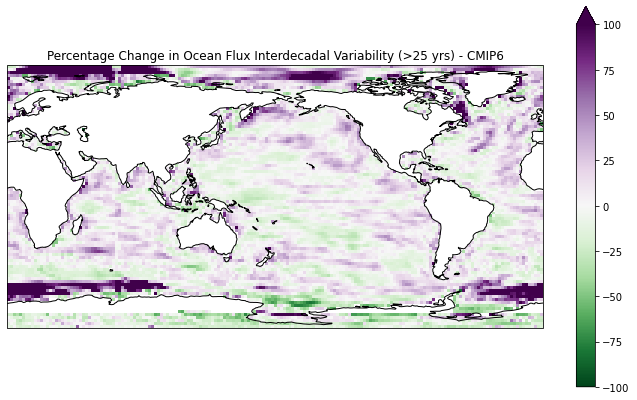

In [24]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
percent_ocean_flux.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-100, vmax=100)
ax.coastlines(color='black', linewidth=1)
plt.title('Percentage Change in Ocean Flux Interdecadal Variability (>25 yrs) - CMIP6')

Text(0.5, 1.0, 'Percentage Change in Ocean Flux Interdecadal Variability (>25 yrs) - CMIP6')

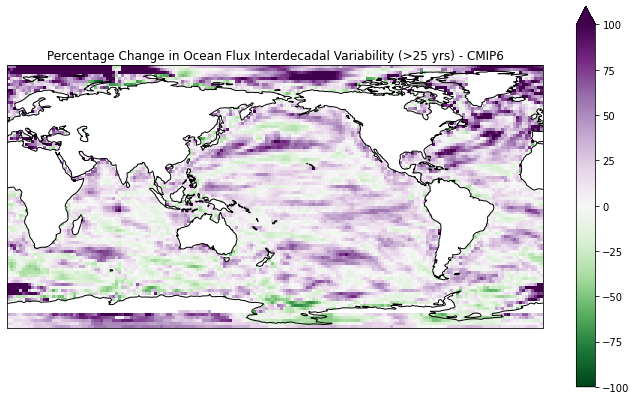

In [22]:
#Redone
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
percent_ocean_flux.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-100, vmax=100)
ax.coastlines(color='black', linewidth=1)
plt.title('Percentage Change in Ocean Flux Interdecadal Variability (>25 yrs) - CMIP6')

# Change in var with chain rule

In [22]:
change_ocean_chain_flux = ocean_flux_hist_chain_ensmean - ocean_flux_control_chain_ensmean

Text(0.5, 1.0, 'Change in Ocean Flux Interdecadal Variability (>25 yrs) - CMIP6')

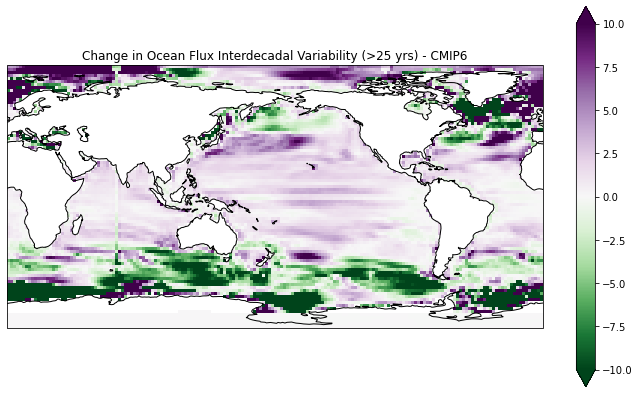

In [24]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
change_ocean_chain_flux.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-10, vmax=10)
ax.coastlines(color='black', linewidth=1)
plt.title('Change in Ocean Flux Interdecadal Variability (>25 yrs) - CMIP6')

In [25]:
percent_ocean_chain_flux = change_ocean_chain_flux*100/ocean_flux_control_chain_ensmean

Text(0.5, 1.0, 'Percentage Change in Ocean Flux Interdecadal Variability (>25 yrs) - CMIP6')

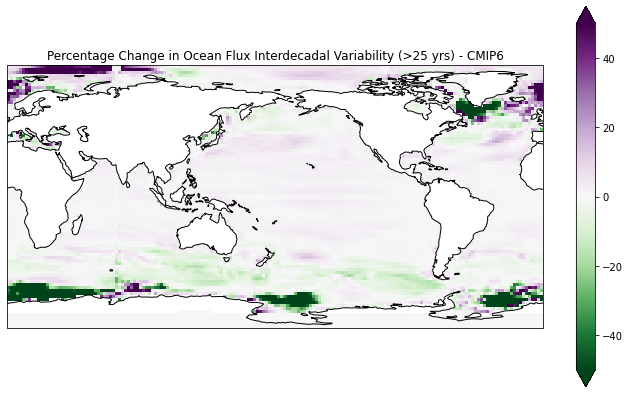

In [27]:
#Redone
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
change_ocean_chain_flux.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-50, vmax=50)
ax.coastlines(color='black', linewidth=1)
plt.title('Percentage Change in Ocean Flux Interdecadal Variability (>25 yrs) - CMIP6')

# Ocean Energy - No Surface E

In [7]:
new_time_index=pd.date_range(start='1851-01-01',freq='M',periods=1500)

density = 1026 #Water density - kg/m3
c_p = 3850 #Specific heat of salt water - J/kgC
seconds = 2600000 #Time in a month - seconds

sst_control = sst_control.isel(time=slice(0,1500))

ocean_energy = xr.DataArray(np.zeros((1500,9,88,179)), dims=['time','name','lat','lon'])
for t in range(1,len(sst_control['time'].values)):
    i = 0
    for model in sst_control['name'].values:
        ocean_energy[t,i,:,:] = density*c_p*mlotst_control_yearly.isel(time=t).sel(name=model)*(sst_control.isel(time=t).sel(name=model) - 
                                                                                                 sst_control.isel(time=t-1).sel(name=model))/seconds
        i += 1
    if t%300==0:
        print(t)
        
ocean_energy.coords['lon'] = sst_control['lon'].values
ocean_energy.coords['lat'] = sst_control['lat'].values
ocean_energy.coords['time'] = new_time_index
ocean_energy.coords['name'] = sst_control['name'].values
ocean_energy

300
600
900
1200


<xarray.DataArray (time: 1500, name: 9, lat: 88, lon: 179)>
array([[[[    0.        ,     0.        ,     0.        , ...,
              0.        ,     0.        ,     0.        ],
         [    0.        ,     0.        ,     0.        , ...,
              0.        ,     0.        ,     0.        ],
         [    0.        ,     0.        ,     0.        , ...,
              0.        ,     0.        ,     0.        ],
         ...,
         [    0.        ,     0.        ,     0.        , ...,
              0.        ,     0.        ,     0.        ],
         [    0.        ,     0.        ,     0.        , ...,
              0.        ,     0.        ,     0.        ],
         [    0.        ,     0.        ,     0.        , ...,
              0.        ,     0.        ,     0.        ]],

        [[    0.        ,     0.        ,     0.        , ...,
              0.        ,     0.        ,     0.        ],
         [    0.        ,     0.        ,     0.        , ...,
              0.        ,     0.        ,     0.        ],
         [    0.        ,     0.        ,     0.        , ...,
              0.        ,     0.        ,     0.        ],
...
         [ -583.55826903,  -599.18948846,  -545.87168945, ...,
           -328.4284707 ,  -343.8941943 ,  -426.12551454],
         [ -830.04901027,  -813.14767754,  -790.81106156, ...,
           -440.47091674,  -539.89933385,  -652.58755465],
         [ -768.41188809,  -768.16098334,  -758.32953157, ...,
           -677.87419613,  -722.16687975,  -754.63788691]],

        [[           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         ...,
         [ -948.94837996,  -957.5018131 ,  -966.50096067, ...,
           -844.01648945,  -879.00465734,  -906.40057665],
         [-1050.14442291, -1070.25021753, -1086.51258274, ...,
           -964.3691616 ,  -986.94351809, -1010.49776646],
         [-1057.58689412, -1074.83901516, -1092.96330066, ...,
           -972.19186586,  -994.67736319, -1021.47784332]]]])
Coordinates:
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * time     (time) datetime64[ns] 1851-01-31 1851-02-28 ... 1975-12-31
  * name     (name) object 'GFDL-CM4' 'GFDL-ESM4' ... 'CESM2-WACCM'

In [8]:
ocean_energy_rolling = ocean_energy.rolling(time=300,center=True).mean('time')
ocean_energy_std = ocean_energy_rolling.std('time')
ocean_energy_std = ocean_energy_std.mean('name')

Text(0.5, 1.0, 'Ocean energy  (>25 yrs) - CMIP6')

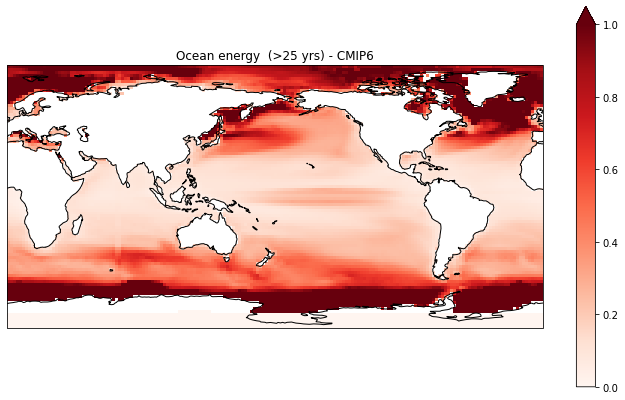

In [14]:
#Redone
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ocean_energy_std.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds', vmin=0, vmax=1)
ax.coastlines(color='black', linewidth=1)
plt.title('Ocean energy  (>25 yrs) - CMIP6')

In [10]:
new_time_index=pd.date_range(start='1851-01-01',freq='M',periods=1500)

density = 1026 #Water density - kg/m3
c_p = 3850 #Specific heat of salt water - J/kgC
seconds = 2600000 #Time in a month - seconds

sst_control = sst_control.isel(time=slice(0,1500))

ocean_energy_chain = xr.DataArray(np.zeros((1500,9,88,179)), dims=['time','name','lat','lon'])
for t in range(1,len(sst_control['time'].values)):
    i = 0
    for model in sst_control['name'].values:
        ocean_energy_chain[t,i,:,:] = density*c_p*mlotst_control_yearly.isel(time=t).sel(name=model)*(sst_control.isel(time=t).sel(name=model) - 
                                                                                                 sst_control.isel(time=t-1).sel(name=model))/seconds + \
                                                 density*c_p*sst_control_yearly.isel(time=t).sel(name=model)*(mlotst_control.isel(time=t).sel(name=model) - 
                                                                                                 mlotst_control.isel(time=t-1).sel(name=model))/seconds
        i += 1
    if t%300==0:
        print(t)
        
ocean_energy_chain.coords['lon'] = sst_control['lon'].values
ocean_energy_chain.coords['lat'] = sst_control['lat'].values
ocean_energy_chain.coords['time'] = new_time_index
ocean_energy_chain.coords['name'] = sst_control['name'].values
ocean_energy_chain

300
600
900
1200


<xarray.DataArray (time: 1500, name: 9, lat: 88, lon: 179)>
array([[[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
...
         [ 7.47652547e+02,  6.83050955e+02,  6.55716926e+02, ...,
           9.05963016e+02,  8.15234870e+02,  8.64754934e+02],
         [-6.00201323e+01, -5.34193464e+01, -3.66081806e+01, ...,
           5.73029592e+01, -7.25888940e+01, -1.22454565e+02],
         [-9.72099245e+01, -5.33163671e+01, -1.27925993e+00, ...,
          -6.25697682e+01, -1.32275989e+02, -1.62762702e+02]],

        [[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         ...,
         [ 5.02116618e+03,  5.04509417e+03,  5.06990676e+03, ...,
           4.47836570e+03,  4.76304888e+03,  4.92363376e+03],
         [ 3.60118837e+03,  3.62990128e+03,  3.66754657e+03, ...,
           3.34567293e+03,  3.44310751e+03,  3.52046603e+03],
         [ 2.69825903e+03,  2.68770683e+03,  2.66441709e+03, ...,
           2.71387312e+03,  2.70957756e+03,  2.70201501e+03]]]])
Coordinates:
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * time     (time) datetime64[ns] 1851-01-31 1851-02-28 ... 1975-12-31
  * name     (name) object 'GFDL-CM4' 'GFDL-ESM4' ... 'CESM2-WACCM'

In [11]:
ocean_energy_chain_rolling = ocean_energy_chain.rolling(time=300, center=True).mean('time')
ocean_energy_chain_std = ocean_energy_chain_rolling.std('time')
ocean_energy_chain_std = ocean_energy_chain_std.mean('name')

Text(0.5, 1.0, 'Ocean energy  (>25 yrs) - CMIP6')

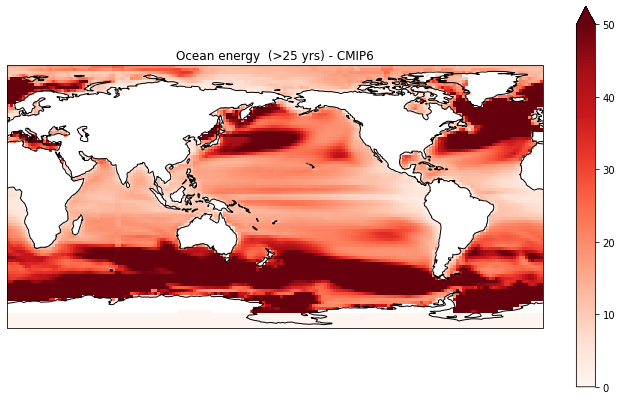

In [13]:
#Redone
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ocean_energy_chain_std.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds', vmin=0, vmax=50)
ax.coastlines(color='black', linewidth=1)
plt.title('Ocean energy  (>25 yrs) - CMIP6')

# Different Timescale Analysis

In [3]:
ocean_yearly = ocean_control.rolling(time=12, center=True).mean('time')
ocean_yearly = ocean_yearly.std('time')
ocean_yearly = ocean_yearly.mean('name')

Text(0.5, 1.0, 'Ocean energy  (1 yr) - CMIP6')

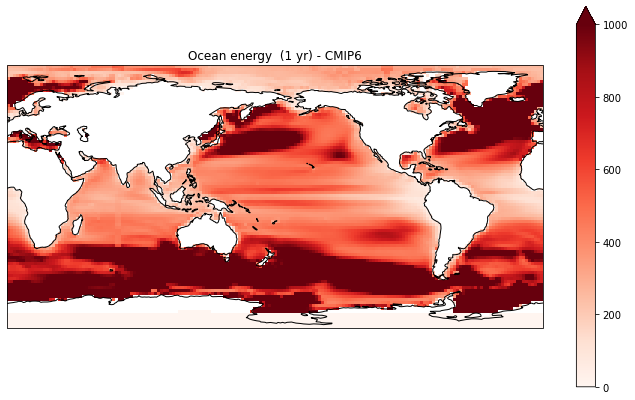

In [8]:
#Redone
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ocean_yearly.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds', vmin=0, vmax=1000)
ax.coastlines(color='black', linewidth=1)
plt.title('Ocean energy  (1 yr) - CMIP6')

In [9]:
ocean_century = ocean_control.rolling(time=1200, center=True).mean('time')
ocean_century = ocean_century.std('time')
ocean_century = ocean_century.mean('name')

Text(0.5, 1.0, 'Ocean energy  (>100 yrs) - CMIP6')

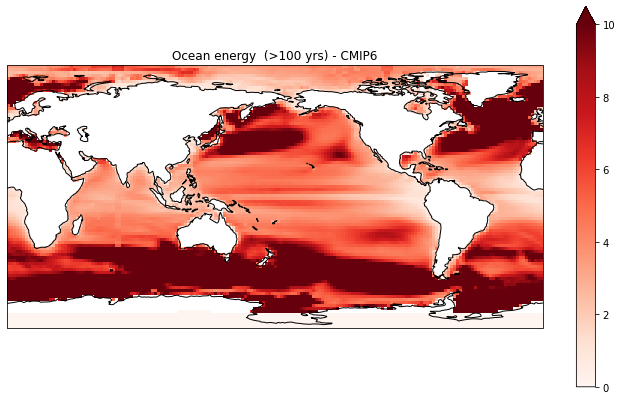

In [13]:
#Redone
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ocean_century.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds', vmin=0, vmax=10)
ax.coastlines(color='black', linewidth=1)
plt.title('Ocean energy  (>100 yrs) - CMIP6')

In [3]:
ocean_biyearly = ocean_control.rolling(time=6, center=True).mean('time')
ocean_biyearly = ocean_biyearly.std('time')
ocean_biyearly = ocean_biyearly.mean('name')

Text(0.5, 1.0, 'Ocean energy  (1/2 year) - CMIP6')

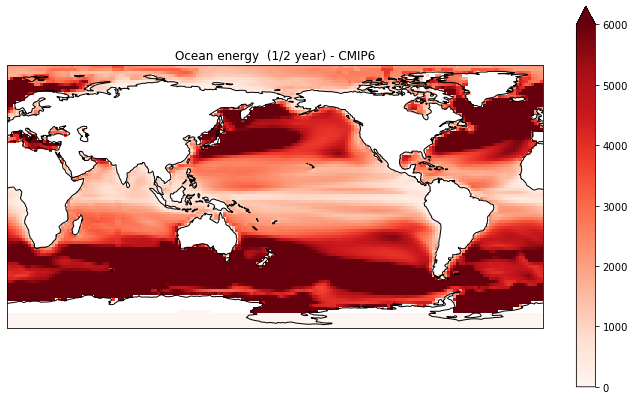

In [9]:
#Redone
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ocean_biyearly.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds', vmin=0, vmax=6000)
ax.coastlines(color='black', linewidth=1)
plt.title('Ocean energy  (1/2 year) - CMIP6')

In [8]:
ocean_monthly = ocean_control.std('time')
ocean_monthly = ocean_monthly.mean('name')

Text(0.5, 1.0, 'Ocean energy  (monthly) - CMIP6')

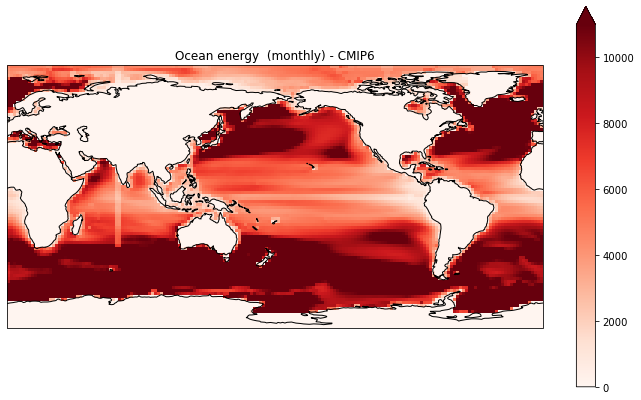

In [13]:
#Redone
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ocean_monthly.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds', vmin=0, vmax=11000)
ax.coastlines(color='black', linewidth=1)
plt.title('Ocean energy  (monthly) - CMIP6')